In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
from nltk import FreqDist
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
import matplotlib.pyplot as plt
sns.set_palette("pastel")
import ast
import networkx as nx

In [2]:
root = "/Users/shashanksingh/Desktop/India_air/AIR_POLLUTION/01_DATA/processed_data/"
figures = "/Users/shashanksingh/Desktop/India_air/github/india_air_pollution/results/descriptive_paper/figures/"
tables = "/Users/shashanksingh/Desktop/India_air/github/india_air_pollution/results/descriptive_paper/tables/"
raw = "/Users/shashanksingh/Desktop/India_air/AIR_POLLUTION/01_DATA/RAW_DATA/Law/"

In [3]:
df_cases_cleaned = pd.read_csv(root+"case_data_final_with_additional_variables.csv")
df_citations = pd.read_csv(raw+"cites_air_cases.csv")

In [4]:
df_cases_cleaned = pd.merge(df_cases_cleaned, df_citations,left_on = "Kanoon_ID" ,right_on = "kanoon_id", how='left')

In [5]:
df_cases_cleaned.head()

Unnamed: 0 participant_label  Kanoon_ID                     Case id  \
0           0   valasa maharshi     1320.0    (2006) 104 TTJ Delhi 213   
1           1     aditya pandav     1569.0  WP(C).No. 21565 of 2009(M)   
2           2      surya sriram     7577.0                         NaN   
3           3          astha123    11626.0                1989 AIR 611   
4           4          astha123    14406.0            2004 (3) KLT 577   

           Judge 1     Judge 2 Judge 3  \
0          d singh  R c Sharma     NaN   
1           V.GIRI         NaN     NaN   
2  N Hanumanthappa     A Bhate     NaN   
3        Mukharjii  Sabyasachi   KANIA   
4         K B Nair         NaN     NaN   

                                         Petitioners  \
0                  Deputy Commissioner Of Income Tax   
1                                  THANKAMMA PAULOSE   
2  K. Srinivasan, Residents of Krishnapuri Colony...   
3  MEMBER-SECRETARY, ANDHRA PRADESH STATEBOARD FO...   
4                                              Soman   

                                         Respondents Is Appeal  \
0                             Saraya Industries Ltd.        no   
1             THE SECRETARY,KADAPRA GRAMA PANCHAYAT,        no   
2  Executive Officer, Cantonment, Kartik Construc...        no   
3                   Andhra Pradesh Rayons Ltd. & Ors        no   
4                                          Geologist        no   

  Is Constitutional Petitioner Advocate Respondent Advocate  \
0                no                  na                  na   
1                no      BABU CHERUKARA       No Appearance   
2                no                 NaN                 NaN   
3                no                 n.a                 n.a   
4               yes                 n.a                 n.a   

                                   Company           State   District  \
0                   Saraya Industries Ltd.    NCT of Delhi  New Delhi   
1                                      NaN             NaN        NaN   
2  Kartik Constructions of West Maredpalli  Andhra Pradesh  Hyderabad   
3                                      n.a    NCT of Delhi        n.a   
4                                      n.a          Kerala        n.a   

    Govt Role Social Impact   name_cleaned_1 name_cleaned_2 name_cleaned_3  \
0  petitioner            no          d singh     r c sharma            NaN   
1        none            no           v giri            NaN            NaN   
2        none           yes  n hanumanthappa        a bhate            NaN   
3  respondent           yes        mukharjii     sabyasachi          kania   
4        none           yes         k b nair            NaN            NaN   

                name_matched_1            name_matched_2 name_matched_3  \
0                    a d singh            r c deo sharma            NaN   
1                          NaN                       NaN            NaN   
2  nyaka yellapa hanumanthappa                       NaN            NaN   
3                          NaN  sabyasachi bhattacharyya        h kania   
4          k balakrishnan nair                       NaN            NaN   

  Year_judge_1 Data_Source_judge_1 Raw_biodata2017Handbooks_judge_1  \
0            .       State Website                              NaN   
1          NaN                 NaN                              NaN   
2            .       State Website                              NaN   
3          NaN                 NaN                              NaN   
4            .       State Website                              NaN   

  Raw_biodata2014Handbooks_judge_1  \
0                              NaN   
1                              NaN   
2                              NaN   
3                              NaN   
4                              NaN   

                              Raw_biowebsite_judge_1 State_y_judge_1  \
0  Justice Anil Dev Singh, BSc., LL.B. - Born on ...           Delhi   
1                                

In [6]:
df_cases_cleaned_only_important = df_cases_cleaned[df_cases_cleaned["importance_score"]>0]

In [7]:
len(df_cases_cleaned_only_important)

1098

In [8]:
len(df_cases_cleaned)

1910

In [9]:
j1,j2,j3 = list(df_cases_cleaned["name_cleaned_1"]),list(df_cases_cleaned["name_cleaned_2"]),list(df_cases_cleaned["name_cleaned_3"])
judges = j1+j2+j3
judges_nonan = [ele for ele in judges if type(ele)==str]

In [10]:
df_judges = pd.DataFrame(data=FreqDist(judges_nonan).most_common(), columns = ["judge", "number of cases"])
judges = list(df_judges["judge"])
list_avg_green_cases = []
list_num_green_cases = []

for judge in judges:
    
    avg_green1=0
    avg_green2=0
    avg_green3=0
    
    num_green1=0
    num_green2=0
    num_green3=0
    
    n1=1
    n2=1
    n3=1
    
    if judge in j1:
        num_green1 = len(df_cases_cleaned[(df_cases_cleaned["name_cleaned_1"]==judge) & (df_cases_cleaned["mean_coded_vals"]>0)])
        n1 = len(df_cases_cleaned[df_cases_cleaned["name_cleaned_1"]==judge])
        avg_green1 = df_cases_cleaned[df_cases_cleaned["name_cleaned_1"]==judge]["mean_coded_vals"].mean()
        
    if judge in j2:
        num_green2 = len(df_cases_cleaned[(df_cases_cleaned["name_cleaned_2"]==judge) & (df_cases_cleaned["mean_coded_vals"]>0)])
        n2 = len(df_cases_cleaned[df_cases_cleaned["name_cleaned_2"]==judge])
        avg_green2 = df_cases_cleaned[df_cases_cleaned["name_cleaned_2"]==judge]["mean_coded_vals"].mean()
        
    if judge in j3:
        num_green3 = len(df_cases_cleaned[(df_cases_cleaned["name_cleaned_3"]==judge) & (df_cases_cleaned["mean_coded_vals"]>0)])
        n3 = len(df_cases_cleaned[df_cases_cleaned["name_cleaned_3"]==judge])
        avg_green3 = df_cases_cleaned[df_cases_cleaned["name_cleaned_3"]==judge]["mean_coded_vals"].mean()
        
    num_green_final = num_green1+num_green2+num_green3
    
    list_num_green_cases.append(num_green_final)
    
    avg_green_final = (avg_green1*n1 + avg_green2*n2 + avg_green3*n3)/(n1+n2+n3)
    
    list_avg_green_cases.append(avg_green_final)
    
    
        

In [11]:
len(df_judges)

1120

In [12]:
len(judges_nonan)

2838

In [13]:
df_judges["average green-ness"] = list_avg_green_cases
df_judges["number of green cases"] = list_num_green_cases

In [14]:
df_judges.describe()

number of cases  average green-ness  number of green cases
count      1120.000000         1120.000000            1120.000000
mean          2.533929            0.132826               0.905357
std           3.818808            0.164382               2.047682
min           1.000000            0.000000               0.000000
25%           1.000000            0.000000               0.000000
50%           1.000000            0.000000               0.000000
75%           3.000000            0.250000               1.000000
max          53.000000            0.750000              30.000000

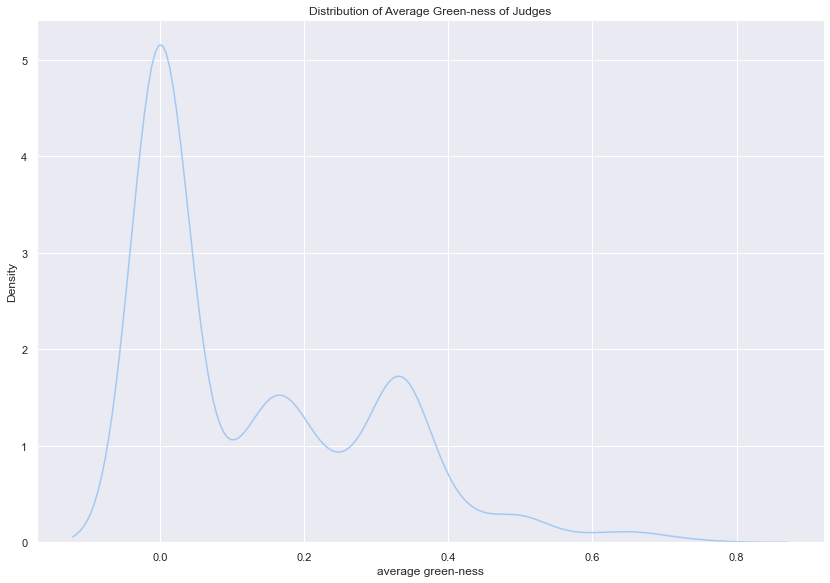

In [15]:
f = sns.kdeplot(data=df_judges, x=df_judges["average green-ness"]).set(title="Distribution of Average Green-ness of Judges")
plt.tight_layout()
#f = fig.get_figure()
plt.savefig(figures+"dist_avg_green_cases_by_judge.jpg")
plt.show()

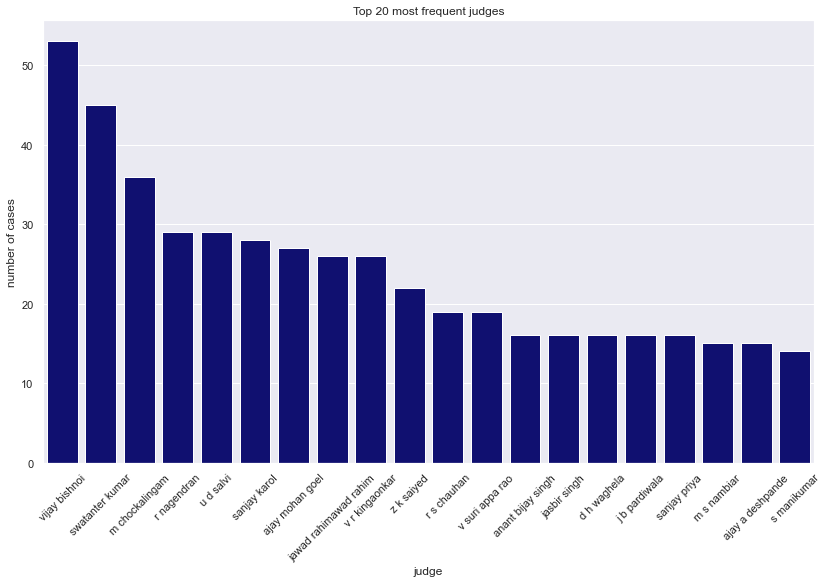

In [16]:
f=sns.barplot(data = df_judges, x = df_judges[:20].judge, y = df_judges[:20]["number of cases"], color = "navy").set(title="Top 20 most frequent judges")
plt.xticks(rotation=45)
plt.tight_layout()
#f = fig.get_figure()
plt.savefig(figures+"top20judges.jpg")
plt.show()

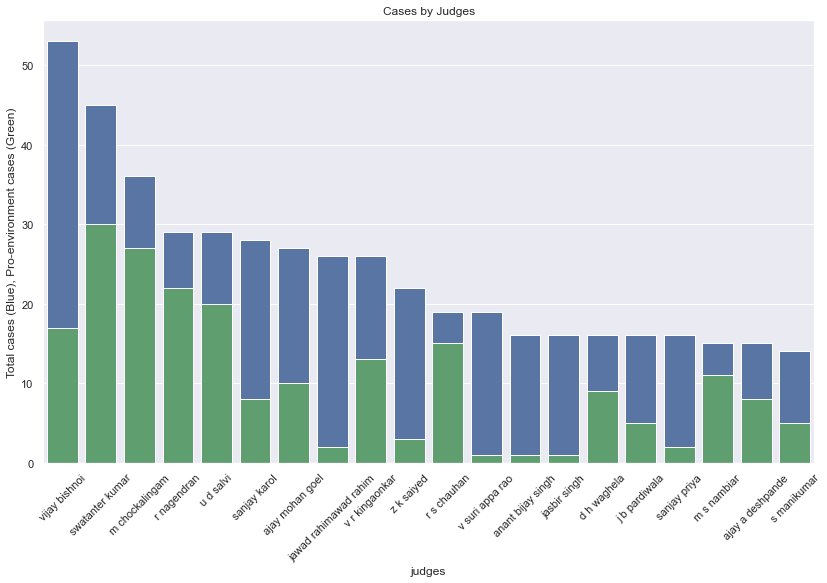

In [17]:
# creating subplots
ax = plt.subplots()
 
# plotting columns
ax = sns.barplot(x=df_judges[:20]["judge"], y=df_judges[:20]["number of cases"], color='b')
ax = sns.barplot(x=df_judges[:20]["judge"], y=df_judges[:20]["number of green cases"], color='g')
 
# renaming the axes
ax.set(xlabel="judges", ylabel="Total cases (Blue), Pro-environment cases (Green)", title="Cases by Judges")
 
# visualizing illustration
plt.xticks(rotation=45)
plt.tight_layout()
#f = fig.get_figure()
plt.savefig(figures+"top20judges_hues.jpg")
plt.show()

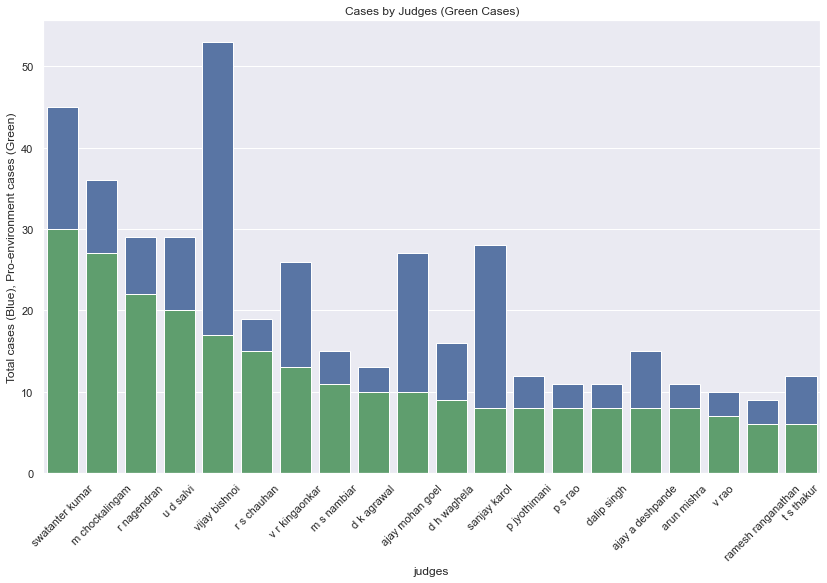

In [18]:
df_judges = df_judges.sort_values(["number of green cases"], ascending=False)


# creating subplots
ax = plt.subplots()
 
# plotting columns
ax = sns.barplot(x=df_judges[:20]["judge"], y=df_judges[:20]["number of cases"], color='b')
ax = sns.barplot(x=df_judges[:20]["judge"], y=df_judges[:20]["number of green cases"], color='g')
 
# renaming the axes
ax.set(xlabel="judges", ylabel="Total cases (Blue), Pro-environment cases (Green)", title="Cases by Judges (Green Cases)")
 
# visualizing illustration
plt.xticks(rotation=45)
plt.tight_layout()
#f = fig.get_figure()
plt.savefig(figures+"top20judges_green.jpg")
plt.show()


In [19]:
#df_cases_cleaned["state_cleaned"] = df_cases_cleaned["District-State"].apply(lambda x : x.lower().split("-")[-1])
states = list(df_cases_cleaned["state"])
states_nonan = [ele for ele in states if type(ele)==str]
df_states = pd.DataFrame(data=FreqDist(states_nonan).most_common(), columns = ["states", "number of cases"])
states = list(df_states["states"])
list_num_green_cases = []

for state in states:
    
    num = len(df_cases_cleaned[(df_cases_cleaned["state"]==state) & (df_cases_cleaned["mean_coded_vals"]>0)])
    list_num_green_cases.append(num)
    
#df_states["average green cases"] = list_avg_green_cases
#df_states["number of green cases"] = df_states["average green cases"]*df_states["number of cases"]

df_states["number of green cases"] = list_num_green_cases

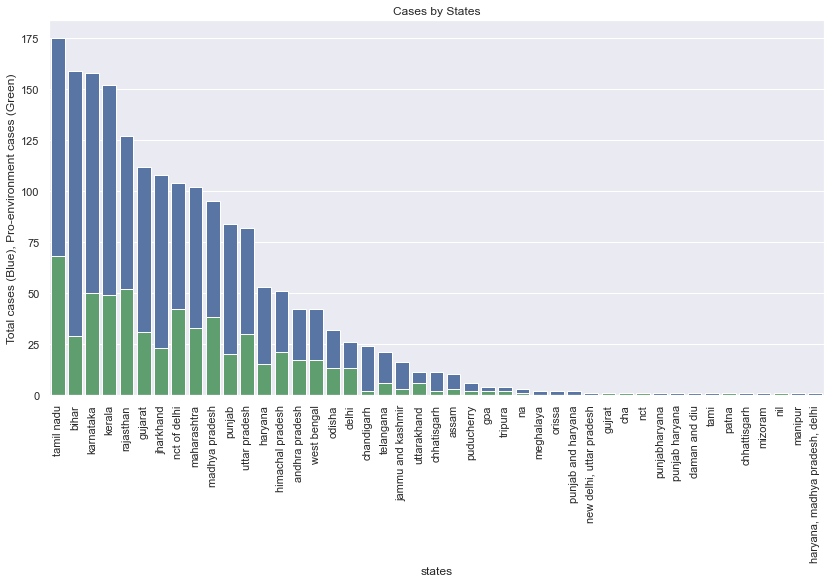

In [20]:
# creating subplots
ax = plt.subplots()
 
# plotting columns
ax = sns.barplot(x=df_states["states"], y=df_states["number of cases"], color='b')
ax = sns.barplot(x=df_states["states"], y=df_states["number of green cases"], color='g')
 
# renaming the axes
ax.set(xlabel="states", ylabel="Total cases (Blue), Pro-environment cases (Green)", title="Cases by States")
 
# visualizing illustration

plt.xticks(rotation=90)
plt.tight_layout()
#f = fig.get_figure()
plt.savefig(figures+"states.jpg")
plt.show()

In [21]:
# descriptive table
descriptives_df = df_cases_cleaned[['ed_ba_judge_1',
 'ed_ba_judge_2',
 'ed_ba_judge_3',
 'ed_ma_judge_1',
 'ed_ma_judge_2',
 'ed_ma_judge_3',
 'ed_bsc_judge_1',
 'ed_bsc_judge_2',
 'ed_bsc_judge_3',
 'ed_msc_judge_1',
 'ed_msc_judge_2',
 'ed_msc_judge_3',
 'ed_bcom_judge_1',
 'ed_bcom_judge_2',
 'ed_bcom_judge_3',
 'ed_mcom_judge_1',
 'ed_mcom_judge_2',
 'ed_mcom_judge_3',
 'ed_llb_judge_1',
 'ed_llb_judge_2',
 'ed_llb_judge_3',
 'ed_llm_judge_1',
 'ed_llm_judge_2',
 'ed_llm_judge_3',
 'ed_ics_judge_1',
 'ed_ics_judge_2',
 'ed_ics_judge_3',
 'ed_aca_judge_1',
 'ed_aca_judge_2',
 'ed_aca_judge_3',
 'ed_doc_judge_1',
 'ed_doc_judge_2',
 'ed_doc_judge_3',
 'gender_binary_judge_1',
 'gender_binary_judge_2',
 'gender_binary_judge_3',
 'birth_year_judge_1',
 'birth_year_judge_2',
 'birth_year_judge_3',
 'district',
 'state',
 'impact_coded',
 'govt_respondent',
 'govt_petitioner',
 'is_appeal',
 'is_constitutional',
 'mean_coded_vals',
 'most_freq_coded_vals',
 'case_title',
 'delivery_year',
 'judge_age_judge_1',
 'judge_age_judge_2',
 'judge_age_judge_3',
 'num_judges',
 'ed_ba',
 'ed_ma',
 'ed_bsc',
 'ed_msc',
 'ed_bcom',
 'ed_mcom',
 'ed_llb',
 'ed_llm',
 'ed_ics',
 'ed_aca',
 'ed_doc',
 'gender_binary',
 'delivery_month',
 'pa_standardised_judge_1',
 'pa_standardised_judge_2',
 'pa_standardised_judge_3',
 'pa_civil_judge_1',
 'pa_civil_judge_2',
 'pa_civil_judge_3',
 'pa_service_judge_1',
 'pa_service_judge_2',
 'pa_service_judge_3',
 'pa_constitution_judge_1',
 'pa_constitution_judge_2',
 'pa_constitution_judge_3',
 'pa_criminal_judge_1',
 'pa_criminal_judge_2',
 'pa_criminal_judge_3',
 'pa_labour_judge_1',
 'pa_labour_judge_2',
 'pa_labour_judge_3',
 'pa_company_judge_1',
 'pa_company_judge_2',
 'pa_company_judge_3',
 'pa_tax_judge_1',
 'pa_tax_judge_2',
 'pa_tax_judge_3',
 'pa_administrative_judge_1',
 'pa_administrative_judge_2',
 'pa_administrative_judge_3',
 'pa_commercial_judge_1',
 'pa_commercial_judge_2',
 'pa_commercial_judge_3',
 'pa_arbitration_judge_1',
 'pa_arbitration_judge_2',
 'pa_arbitration_judge_3',
 'pa_family_judge_1',
 'pa_family_judge_2',
 'pa_family_judge_3',
 'pa_civil',
 'pa_service',
 'pa_constitution',
 'pa_criminal',
 'pa_labour',
 'pa_company',
 'pa_tax',
 'pa_administrative',
 'pa_commercial',
 'pa_arbitration',
 'pa_family',
 'text',
 'titles_cited',
 'importance_score',
 'officer_petitioner',
 'officer_respondent',
 'num_titles_cited',
 'length_of_case', "num_cites"]].describe().T

In [22]:
descriptives_df[:50].round(3)

count      mean     std     min     25%     50%  \
ed_ba_judge_1          1910.0     0.135   0.342     0.0     0.0     0.0   
ed_ba_judge_2          1910.0     0.045   0.206     0.0     0.0     0.0   
ed_ba_judge_3          1910.0     0.008   0.088     0.0     0.0     0.0   
ed_ma_judge_1          1910.0     0.058   0.234     0.0     0.0     0.0   
ed_ma_judge_2          1910.0     0.034   0.181     0.0     0.0     0.0   
ed_ma_judge_3          1910.0     0.000   0.000     0.0     0.0     0.0   
ed_bsc_judge_1         1910.0     0.140   0.347     0.0     0.0     0.0   
ed_bsc_judge_2         1910.0     0.024   0.153     0.0     0.0     0.0   
ed_bsc_judge_3         1910.0     0.000   0.000     0.0     0.0     0.0   
ed_msc_judge_1         1910.0     0.001   0.023     0.0     0.0     0.0   
ed_msc_judge_2         1910.0     0.016   0.126     0.0     0.0     0.0   
ed_msc_judge_3         1910.0     0.000   0.000     0.0     0.0     0.0   
ed_bcom_judge_1        1910.0     0.025   0.155     0.0     0.0     0.0   
ed_bcom_judge_2        1910.0     0.035   0.183     0.0     0.0     0.0   
ed_bcom_judge_3        1910.0     0.000   0.000     0.0     0.0     0.0   
ed_mcom_judge_1        1910.0     0.003   0.056     0.0     0.0     0.0   
ed_mcom_judge_2        1910.0     0.000   0.000     0.0     0.0     0.0   
ed_mcom_judge_3        1910.0     0.002   0.040     0.0     0.0     0.0   
ed_llb_judge_1         1910.0     0.354   0.478     0.0     0.0     0.0   
ed_llb_judge_2         1910.0     0.128   0.334     0.0     0.0     0.0   
ed_llb_judge_3         1910.0     0.010   0.099     0.0     0.0     0.0   
ed_llm_judge_1         1910.0     0.041   0.199     0.0     0.0     0.0   
ed_llm_judge_2         1910.0     0.019   0.138     0.0     0.0     0.0   
ed_llm_judge_3         1910.0     0.001   0.023     0.0     0.0     0.0   
ed_ics_judge_1         1910.0     0.002   0.040     0.0     0.0     0.0   
ed_ics_judge_2         1910.0     0.000   0.000     0.0     0.0     0.0   
ed_ics_judge_3         1910.0     0.000   0.000     0.0     0.0     0.0   
ed_aca_judge_1         1910.0     0.000   0.000     0.0     0.0     0.0   
ed_aca_judge_2         1910.0     0.000   0.000     0.0     0.0     0.0   
ed_aca_judge_3         1910.0     0.000   0.000     0.0     0.0     0.0   
ed_doc_judge_1         1910.0     0.002   0.046     0.0     0.0     0.0   
ed_doc_judge_2         1910.0     0.003   0.056     0.0     0.0     0.0   
ed_doc_judge_3         1910.0     0.000   0.000     0.0     0.0     0.0   
gender_binary_judge_1  1730.0     0.973   0.161     0.0     1.0     1.0   
gender_binary_judge_2   764.0     0.962   0.191     0.0     1.0     1.0   
gender_binary_judge_3    61.0     0.951   0.218     0.0     1.0     1.0   
impact_coded           1910.0     0.252   0.434     0.0     0.0     0.0   
govt_respondent        1910.0     0.867   0.340     0.0     1.0     1.0   
govt_petitioner        1910.0     0.084   0.278     0.0     0.0     0.0   
is_appeal              1910.0     0.267   0.443     0.0     0.0     0.0   
is_constitutional      1910.0     0.126   0.332     0.0     0.0     0.0   
mean_coded_vals        1910.0     0.268   0.409     0.0     0.0     0.0   
most_freq_coded_vals   1910.0     0.267   0.409     0.0     0.0     0.0   
delivery_year          1905.0  2011.767   7.529  1981.0  2010.0  2014.0   
judge_age_judge_1       663.0    56.167   7.039    -4.0    52.0    58.0   
judge_age_judge_2       271.0    54.587   7.614     3.0    51.0    55.0   
judge_age_judge_3         5.0    52.400  13.975    33.0    42.0    62.0   
num_judges             1910.0     1.489   0.585     0.0     1.0     1.0   
ed_ba                  1910.0     0.155   0.348     0.0     0.0     0.0   
ed_ma                  1910.0     0.081   0.264     0.0     0.0     0.0   

                          75%     max  
ed_ba_judge_1             0.0     1.0  
ed_ba_judge_2             0.0     1.0  
ed_ba_judge_3             0.0     1.0  
ed_ma_judge_1             0.0     1.0 

In [23]:
descriptives_df[50:].round(3)

count      mean        std    min     25%     50%  \
ed_bsc              1910.0     0.136      0.325    0.0    0.00     0.0   
ed_msc              1910.0     0.008      0.061    0.0    0.00     0.0   
ed_bcom             1910.0     0.043      0.183    0.0    0.00     0.0   
ed_mcom             1910.0     0.004      0.057    0.0    0.00     0.0   
ed_llb              1910.0     0.414      0.484    0.0    0.00     0.0   
...                    ...       ...        ...    ...     ...     ...   
officer_petitioner  1910.0     0.002      0.040    0.0    0.00     0.0   
officer_respondent  1910.0     0.068      0.251    0.0    0.00     0.0   
num_titles_cited    1910.0     4.515      2.070    1.0    3.00     5.0   
length_of_case      1910.0  4919.081  11708.045  134.0  598.25  1875.5   
num_cites           1910.0     3.182     34.594    0.0    0.00     0.0   

                       75%       max  
ed_bsc                 0.0       1.0  
ed_msc                 0.0       1.0  
ed_bcom                0.0       1.0  
ed_mcom                0.0       1.0  
ed_llb                 1.0       1.0  
...                    ...       ...  
officer_petitioner     0.0       1.0  
officer_respondent     0.0       1.0  
num_titles_cited       5.0      10.0  
length_of_case      5675.0  351450.0  
num_cites              0.0    1309.0  

[61 rows x 8 columns]

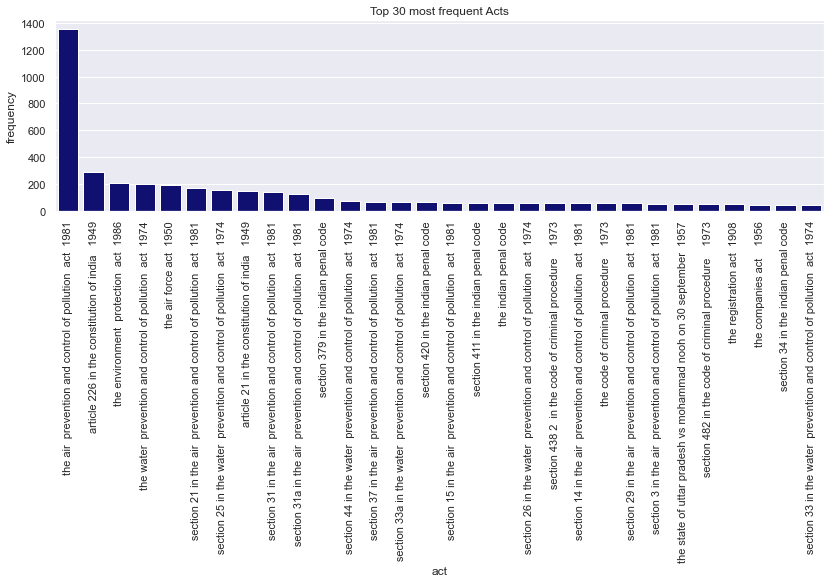

In [24]:
df_cases_cleaned["titles_cited"] = df_cases_cleaned["titles_cited"].apply(lambda x : ast.literal_eval(x))
list_all_titles = list(df_cases_cleaned["titles_cited"])
flat_list = [item for sublist in list_all_titles for item in sublist]
flat_list_freq = FreqDist(flat_list).most_common(30)
df_acts = pd.DataFrame(columns = ["act", "frequency"], data = flat_list_freq)
f=sns.barplot(data = df_acts, x = df_acts.act, y = df_acts["frequency"], color = "navy").set(title="Top 30 most frequent Acts")
plt.xticks(rotation=90)
plt.tight_layout()
#f = fig.get_figure()
plt.savefig(figures+"top30acts.jpg")
plt.show()

## 2. Producing the same for "important" cases

In [25]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
from nltk import FreqDist
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
import matplotlib.pyplot as plt
sns.set_palette("pastel")

In [26]:
root = "/Users/shashanksingh/Desktop/India_air/AIR_POLLUTION/01_DATA/processed_data/"
figures = "/Users/shashanksingh/Desktop/India_air/github/india_air_pollution/results/descriptive_paper/figures/"
tables = "/Users/shashanksingh/Desktop/India_air/github/india_air_pollution/results/descriptive_paper/tables/"

In [27]:
df_cases_cleaned = pd.read_csv(root+"case_data_final_with_additional_variables.csv")

In [28]:
df_cases_cleaned_only_important = df_cases_cleaned[df_cases_cleaned["importance_score"]>0]

In [29]:
len(df_cases_cleaned_only_important)

1098

In [30]:
len(df_cases_cleaned)

1910

In [31]:
j1,j2,j3 = list(df_cases_cleaned_only_important["name_cleaned_1"]),list(df_cases_cleaned_only_important["name_cleaned_2"]),list(df_cases_cleaned_only_important["name_cleaned_3"])
judges = j1+j2+j3
judges_nonan = [ele for ele in judges if type(ele)==str]

In [32]:
df_judges = pd.DataFrame(data=FreqDist(judges_nonan).most_common(), columns = ["judge", "number of cases"])
judges = list(df_judges["judge"])
list_avg_green_cases = []
list_num_green_cases = []

for judge in judges:
    
    avg_green1=0
    avg_green2=0
    avg_green3=0
    
    num_green1=0
    num_green2=0
    num_green3=0
    
    n1=1
    n2=1
    n3=1
    
    if judge in j1:
        num_green1 = len(df_cases_cleaned_only_important[(df_cases_cleaned_only_important["name_cleaned_1"]==judge) & (df_cases_cleaned_only_important["mean_coded_vals"]>0)])
        n1 = len(df_cases_cleaned_only_important[df_cases_cleaned_only_important["name_cleaned_1"]==judge])
        avg_green1 = df_cases_cleaned_only_important[df_cases_cleaned_only_important["name_cleaned_1"]==judge]["mean_coded_vals"].mean()
        
    if judge in j2:
        num_green2 = len(df_cases_cleaned_only_important[(df_cases_cleaned_only_important["name_cleaned_2"]==judge) & (df_cases_cleaned_only_important["mean_coded_vals"]>0)])
        n2 = len(df_cases_cleaned_only_important[df_cases_cleaned_only_important["name_cleaned_2"]==judge])
        avg_green2 = df_cases_cleaned_only_important[df_cases_cleaned_only_important["name_cleaned_2"]==judge]["mean_coded_vals"].mean()
        
    if judge in j3:
        num_green3 = len(df_cases_cleaned_only_important[(df_cases_cleaned_only_important["name_cleaned_3"]==judge) & (df_cases_cleaned_only_important["mean_coded_vals"]>0)])
        n3 = len(df_cases_cleaned_only_important[df_cases_cleaned_only_important["name_cleaned_3"]==judge])
        avg_green3 = df_cases_cleaned_only_important[df_cases_cleaned_only_important["name_cleaned_3"]==judge]["mean_coded_vals"].mean()
        
    num_green_final = num_green1+num_green2+num_green3
    
    list_num_green_cases.append(num_green_final)
    
    avg_green_final = (avg_green1*n1 + avg_green2*n2 + avg_green3*n3)/(n1+n2+n3)
    
    list_avg_green_cases.append(avg_green_final)
    
    
        

In [33]:
len(df_judges)

792

In [34]:
len(judges_nonan)

1695

In [35]:
df_judges["average green-ness"] = list_avg_green_cases
df_judges["number of green cases"] = list_num_green_cases

In [36]:
df_judges.describe()

number of cases  average green-ness  number of green cases
count       792.000000          792.000000             792.000000
mean          2.140152            0.135034               0.796717
std           2.560382            0.164715               1.300720
min           1.000000            0.000000               0.000000
25%           1.000000            0.000000               0.000000
50%           1.000000            0.000000               0.000000
75%           2.000000            0.250000               1.000000
max          26.000000            0.750000              14.000000

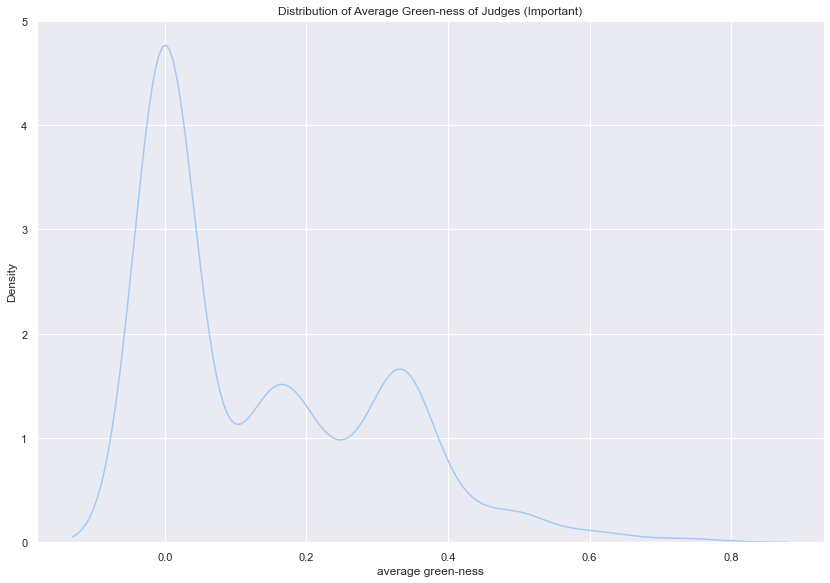

In [37]:
f = sns.kdeplot(data=df_judges, x=df_judges["average green-ness"]).set(title="Distribution of Average Green-ness of Judges (Important)")
plt.tight_layout()
#f = fig.get_figure()
plt.savefig(figures+"dist_avg_green_cases_by_judge_imp.jpg")
plt.show()

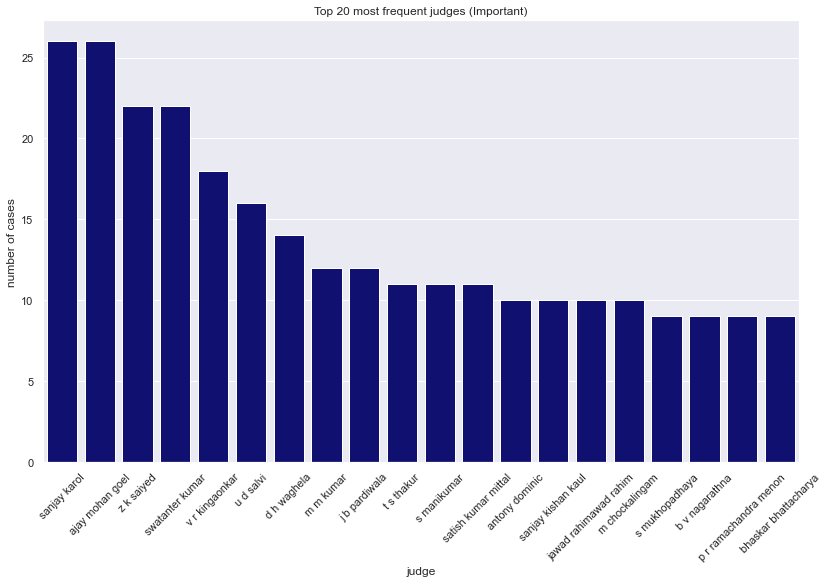

In [38]:
f=sns.barplot(data = df_judges, x = df_judges[:20].judge, y = df_judges[:20]["number of cases"], color = "navy").set(title="Top 20 most frequent judges (Important)")
plt.xticks(rotation=45)
plt.tight_layout()
#f = fig.get_figure()
plt.savefig(figures+"top20judges_imp.jpg")
plt.show()

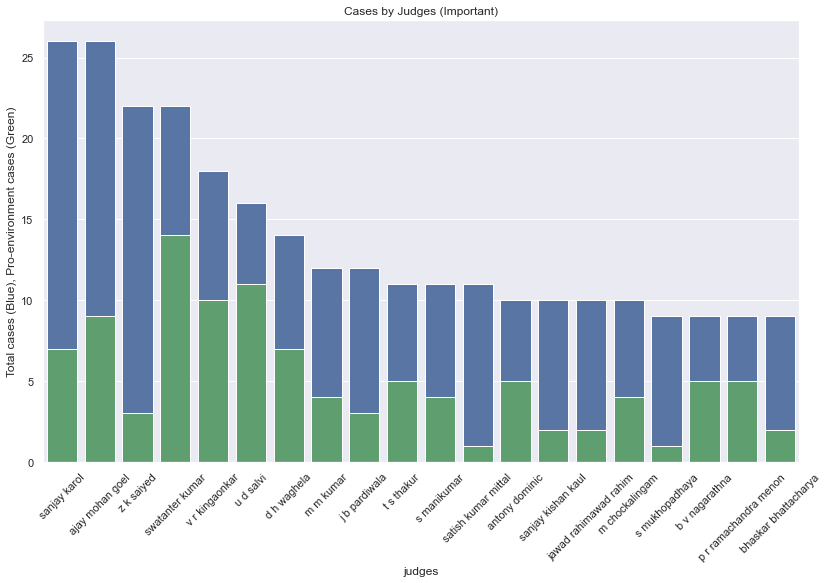

In [39]:
# creating subplots
ax = plt.subplots()
 
# plotting columns
ax = sns.barplot(x=df_judges[:20]["judge"], y=df_judges[:20]["number of cases"], color='b')
ax = sns.barplot(x=df_judges[:20]["judge"], y=df_judges[:20]["number of green cases"], color='g')
 
# renaming the axes
ax.set(xlabel="judges", ylabel="Total cases (Blue), Pro-environment cases (Green)", title="Cases by Judges (Important)")
 
# visualizing illustration
plt.xticks(rotation=45)
plt.tight_layout()
#f = fig.get_figure()
plt.savefig(figures+"top20judges_hues_imp.jpg")
plt.show()

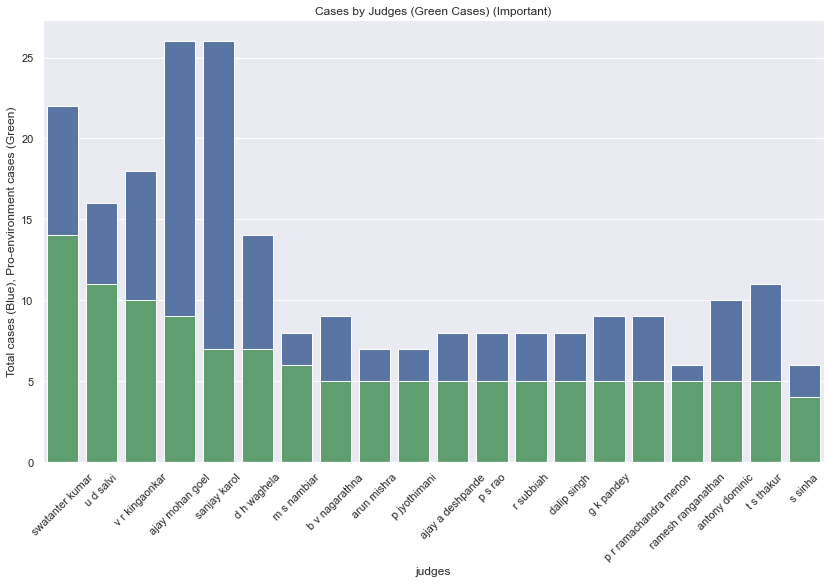

In [40]:
df_judges = df_judges.sort_values(["number of green cases"], ascending=False)


# creating subplots
ax = plt.subplots()
 
# plotting columns
ax = sns.barplot(x=df_judges[:20]["judge"], y=df_judges[:20]["number of cases"], color='b')
ax = sns.barplot(x=df_judges[:20]["judge"], y=df_judges[:20]["number of green cases"], color='g')
 
# renaming the axes
ax.set(xlabel="judges", ylabel="Total cases (Blue), Pro-environment cases (Green)", title="Cases by Judges (Green Cases) (Important)")
 
# visualizing illustration
plt.xticks(rotation=45)
plt.tight_layout()
#f = fig.get_figure()
plt.savefig(figures+"top20judges_green_imp.jpg")
plt.show()


In [41]:
#df_cases_cleaned_only_important["state_cleaned"] = df_cases_cleaned_only_important["District-State"].apply(lambda x : x.lower().split("-")[-1])
states = list(df_cases_cleaned_only_important["state"])
states_nonan = [ele for ele in states if type(ele)==str]
df_states = pd.DataFrame(data=FreqDist(states_nonan).most_common(), columns = ["states", "number of cases"])
states = list(df_states["states"])
list_num_green_cases = []

for state in states:
    
    num = len(df_cases_cleaned_only_important[(df_cases_cleaned_only_important["state"]==state) & (df_cases_cleaned_only_important["mean_coded_vals"]>0)])
    list_num_green_cases.append(num)
    
#df_states["average green cases"] = list_avg_green_cases
#df_states["number of green cases"] = df_states["average green cases"]*df_states["number of cases"]

df_states["number of green cases"] = list_num_green_cases

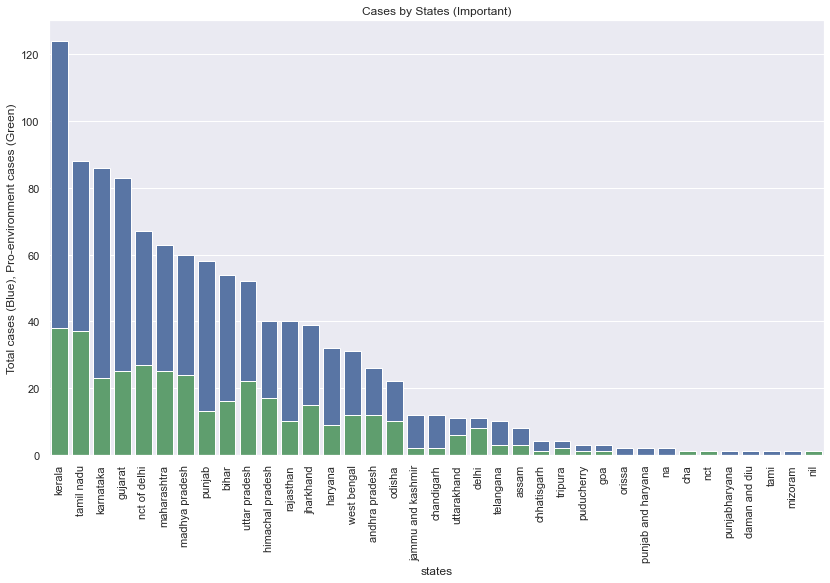

In [42]:
# creating subplots
ax = plt.subplots()
 
# plotting columns
ax = sns.barplot(x=df_states["states"], y=df_states["number of cases"], color='b')
ax = sns.barplot(x=df_states["states"], y=df_states["number of green cases"], color='g')
 
# renaming the axes
ax.set(xlabel="states", ylabel="Total cases (Blue), Pro-environment cases (Green)", title="Cases by States (Important)")
 
# visualizing illustration

plt.xticks(rotation=90)
plt.tight_layout()
#f = fig.get_figure()
plt.savefig(figures+"states_imp.jpg")
plt.show()

/var/folders/k6/kx_d1qpd6gj70c1ws8h73n2r0000gn/T/ipykernel_19630/1247423919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cases_cleaned_only_important["titles_cited"] = df_cases_cleaned_only_important["titles_cited"].apply(lambda x : ast.literal_eval(x))


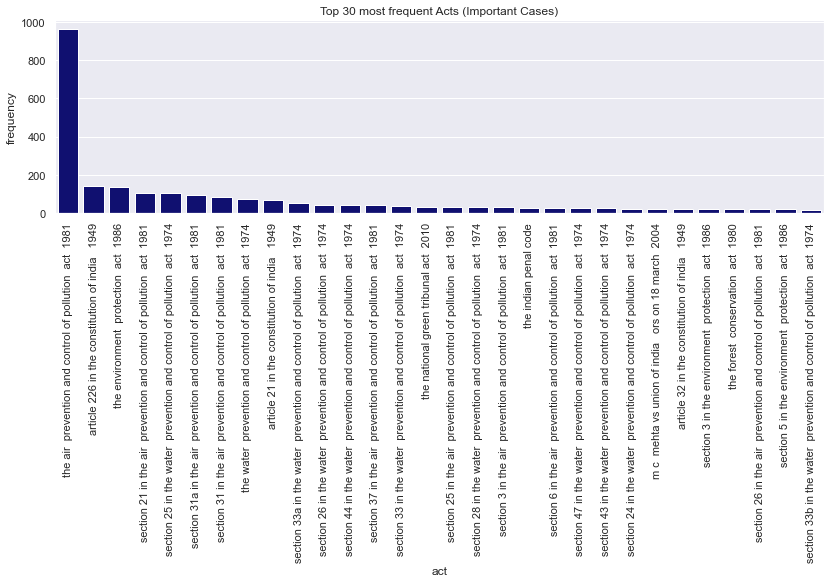

In [43]:
df_cases_cleaned_only_important["titles_cited"] = df_cases_cleaned_only_important["titles_cited"].apply(lambda x : ast.literal_eval(x))
list_all_titles = list(df_cases_cleaned_only_important["titles_cited"])
flat_list = [item for sublist in list_all_titles for item in sublist]
flat_list_freq = FreqDist(flat_list).most_common(30)
df_acts = pd.DataFrame(columns = ["act", "frequency"], data = flat_list_freq)
f=sns.barplot(data = df_acts, x = df_acts.act, y = df_acts["frequency"], color = "navy").set(title="Top 30 most frequent Acts (Important Cases)")
plt.xticks(rotation=90)
plt.tight_layout()
#f = fig.get_figure()
plt.savefig(figures+"top30acts_important.jpg")
plt.show()

# 3. Looking at importance scores, titles cited and case lengths

In [44]:
df_cases_cleaned["length_of_case"].mean()

4919.081151832461

In [45]:
df_cases_cleaned_only_important["length_of_case"].mean()

3494.6721311475408

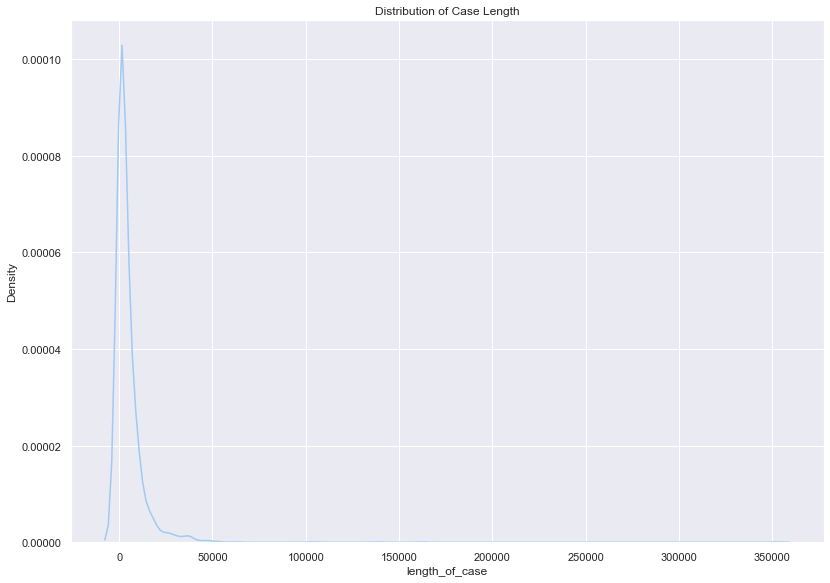

In [46]:
f = sns.kdeplot(data=df_cases_cleaned, x=df_cases_cleaned["length_of_case"]).set(title="Distribution of Case Length")
plt.tight_layout()
#f = fig.get_figure()
plt.savefig(figures+"dist_length_of_case.jpg")
plt.show()

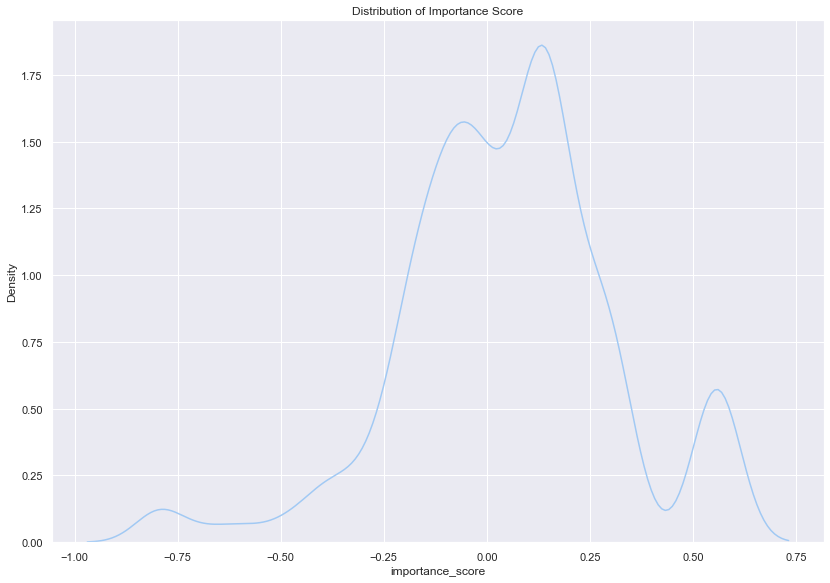

In [47]:
f = sns.kdeplot(data=df_cases_cleaned, x=df_cases_cleaned["importance_score"]).set(title="Distribution of Importance Score")
plt.tight_layout()
#f = fig.get_figure()
plt.savefig(figures+"dist_importance_score.jpg")
plt.show()

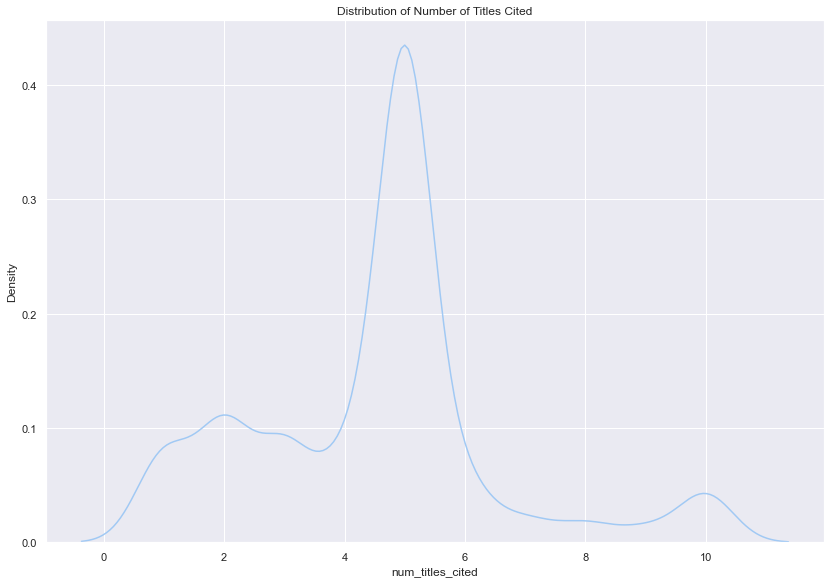

In [48]:
f = sns.kdeplot(data=df_cases_cleaned, x=df_cases_cleaned["num_titles_cited"]).set(title="Distribution of Number of Titles Cited")
plt.tight_layout()
#f = fig.get_figure()
plt.savefig(figures+"dist_num_titles_cited.jpg")
plt.show()

In [49]:
"""f = sns.kdeplot(data=df_cases_cleaned, x=df_cases_cleaned["num_cites"]).set(title="Distribution of number of citations to the case")
plt.tight_layout()
#f = fig.get_figure()
plt.savefig(figures+"dist_num_citations.jpg")
plt.show()"""

'f = sns.kdeplot(data=df_cases_cleaned, x=df_cases_cleaned["num_cites"]).set(title="Distribution of number of citations to the case")\nplt.tight_layout()\n#f = fig.get_figure()\nplt.savefig(figures+"dist_num_citations.jpg")\nplt.show()'

# 4. Possible Judge Networks

In [50]:
df_2 = df_cases_cleaned[df_cases_cleaned["num_judges"]==2]
df_3 = df_cases_cleaned[df_cases_cleaned["num_judges"]==3]

In [51]:
len(df_2)

788

In [52]:
len(df_3)

78

In [53]:
edges_1 = list(zip(df_2["name_cleaned_1"], df_2["name_cleaned_2"]))
edges_2 = list(zip(df_3["name_cleaned_1"], df_3["name_cleaned_2"]))
edges_3 = list(zip(df_3["name_cleaned_1"], df_3["name_cleaned_3"]))
edges_4 = list(zip(df_3["name_cleaned_2"], df_3["name_cleaned_3"]))

edges = edges_1+edges_2+edges_3+edges_4

In [54]:
len(edges)

1022

In [55]:
G = nx.Graph()
G.add_edges_from(edges)

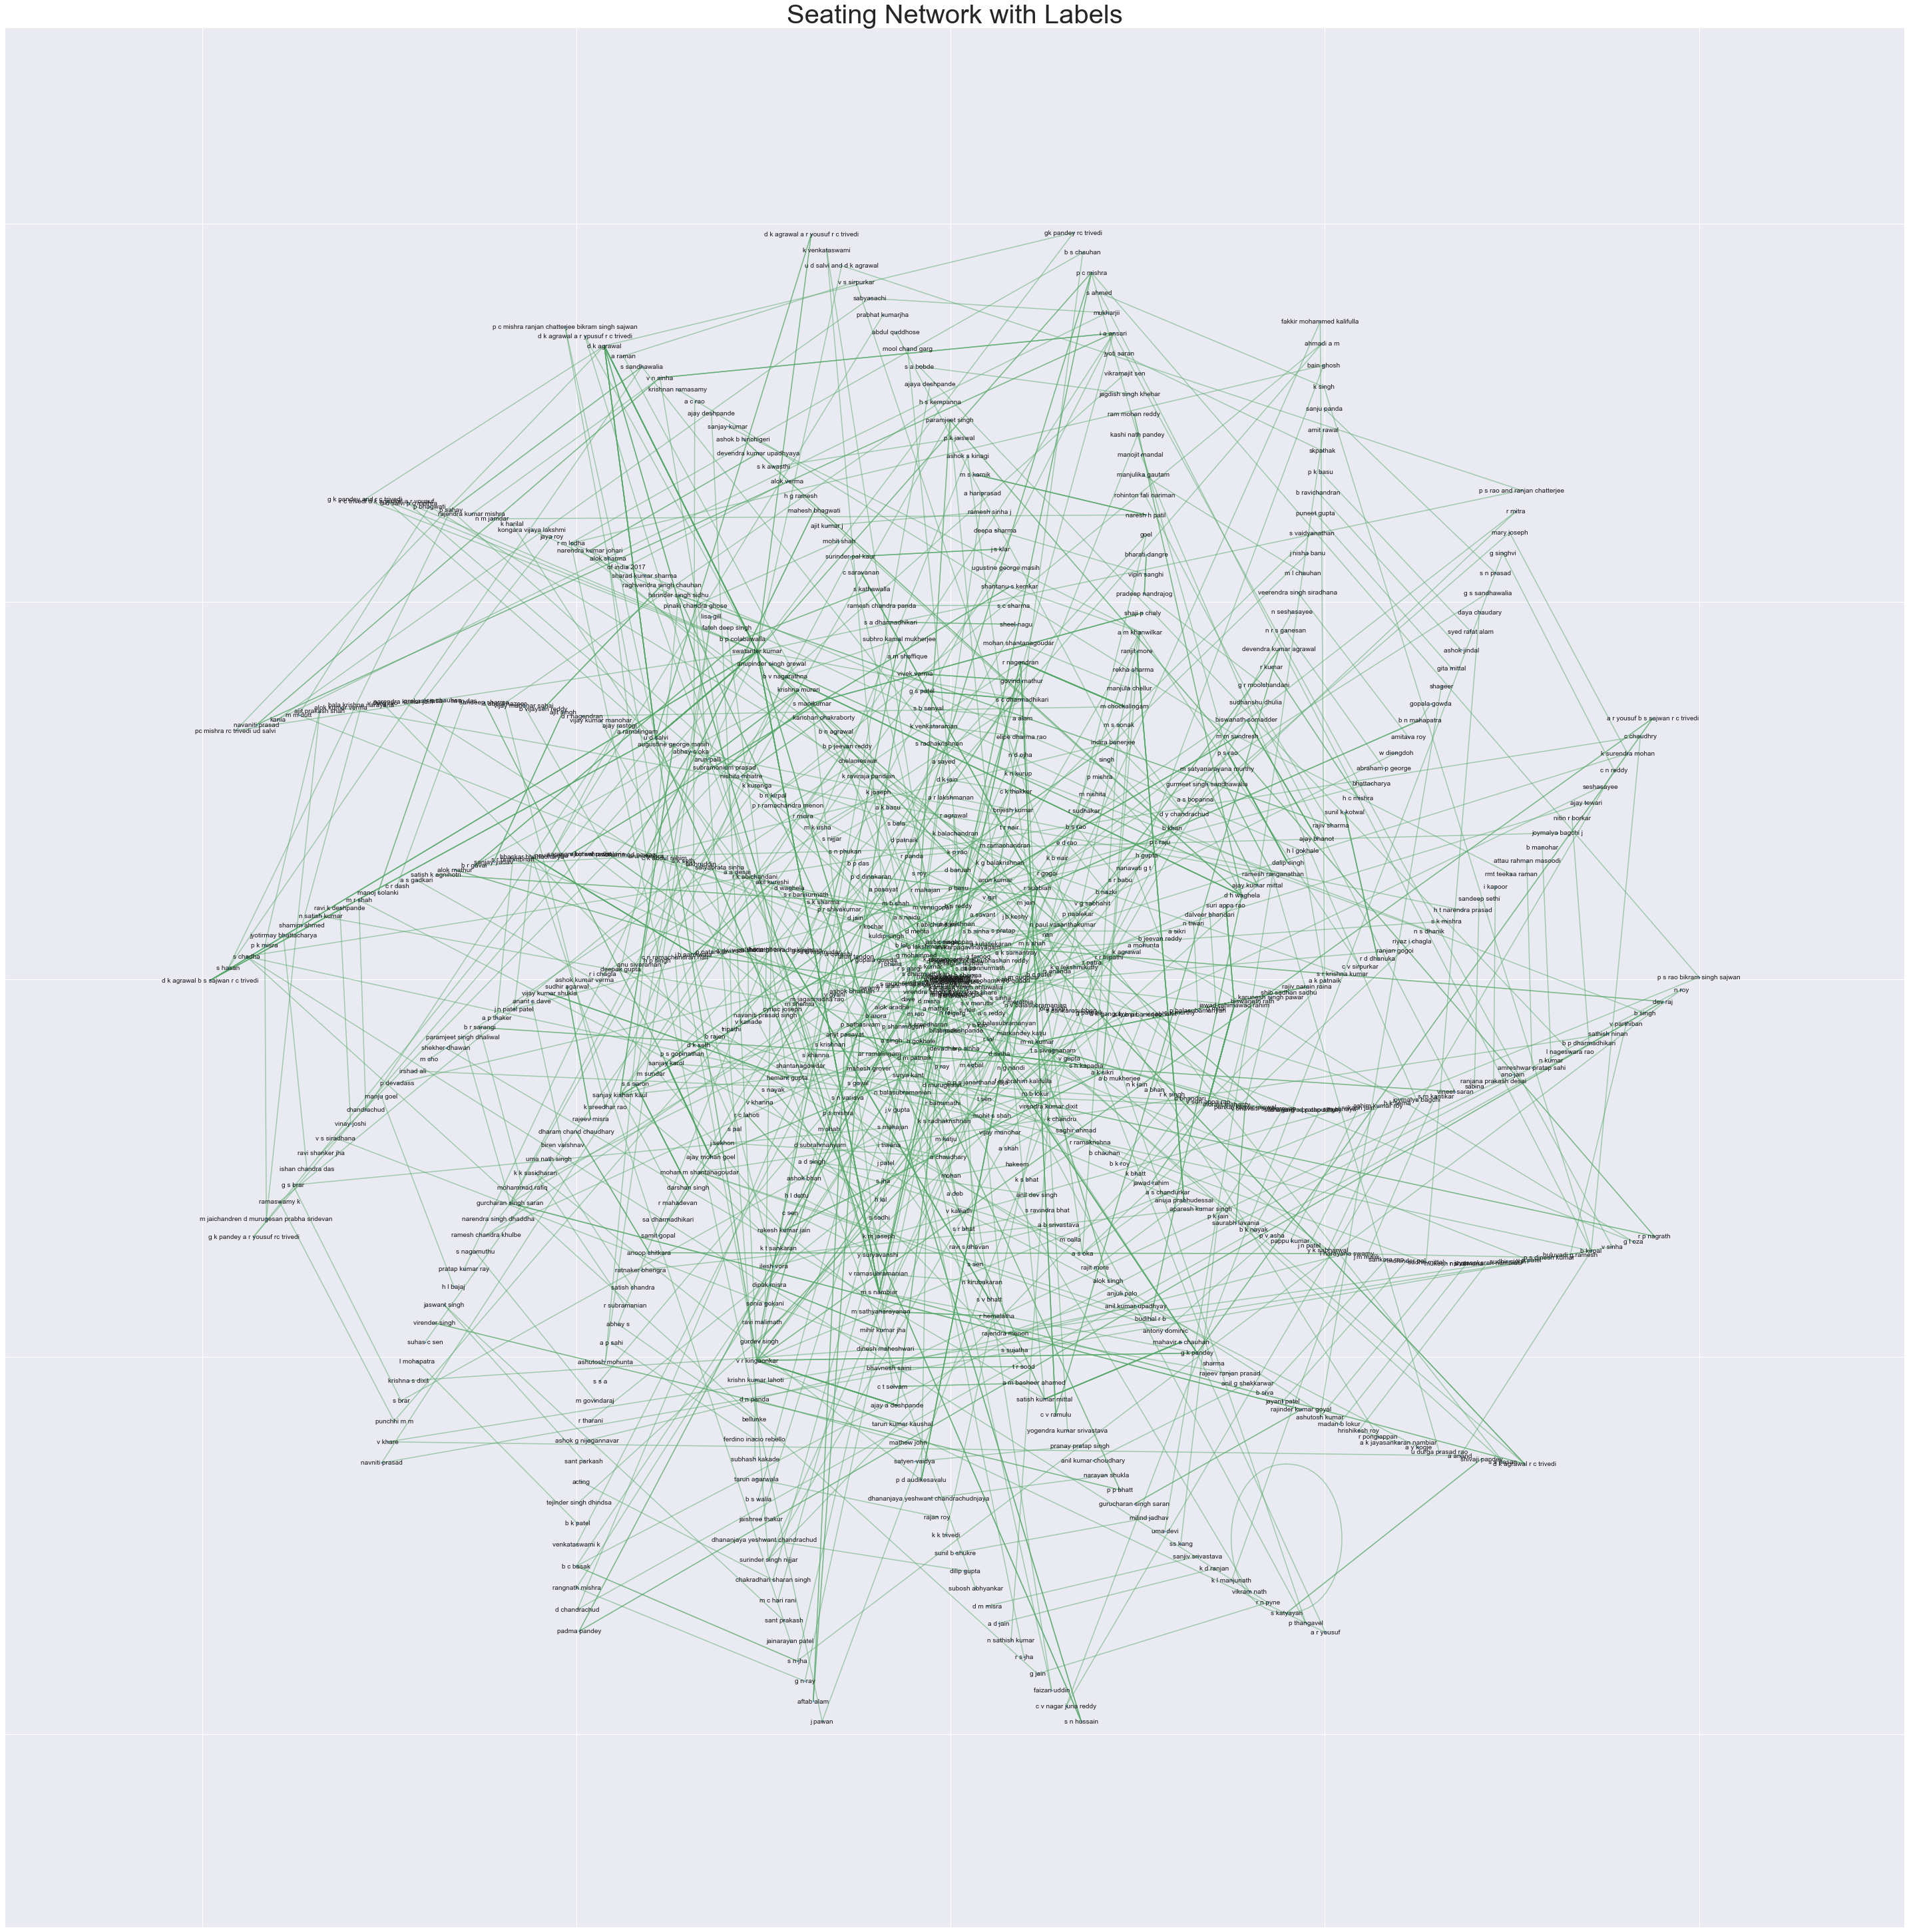

In [56]:
plt.rcParams["figure.figsize"] = (40,40)
pos = nx.spiral_layout(G)

nx.draw_networkx_nodes(G, pos, node_size=1)



nx.draw_networkx_edges(
G, pos, edgelist=edges, width=1.5, alpha=0.5, edge_color="g")


nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")
#edge_labels = nx.get_edge_attributes(G, "weight")

ax = plt.gca()
ax.margins(0.08)
#plt.axis("off")
plt.tight_layout()

plt.title("Seating Network with Labels", fontdict={'fontsize': 40})

plt.savefig(figures+"seating_network.png",bbox_inches='tight')
plt.show()

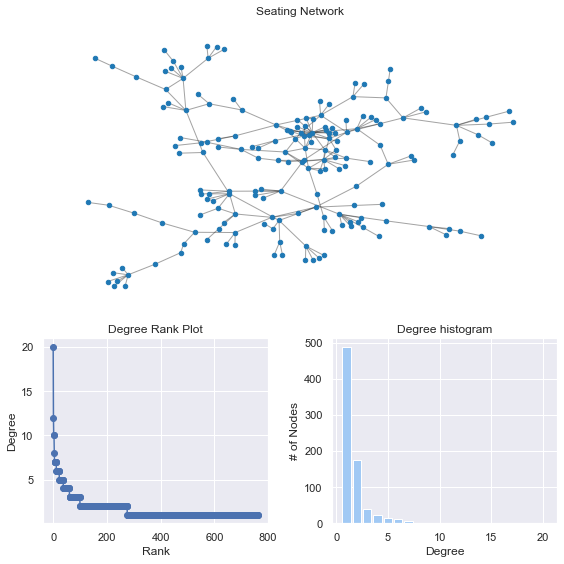

In [57]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of Seating Network", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Seating Network")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.savefig(figures+"degree_seating_network.jpg",bbox_inches='tight')
plt.show()

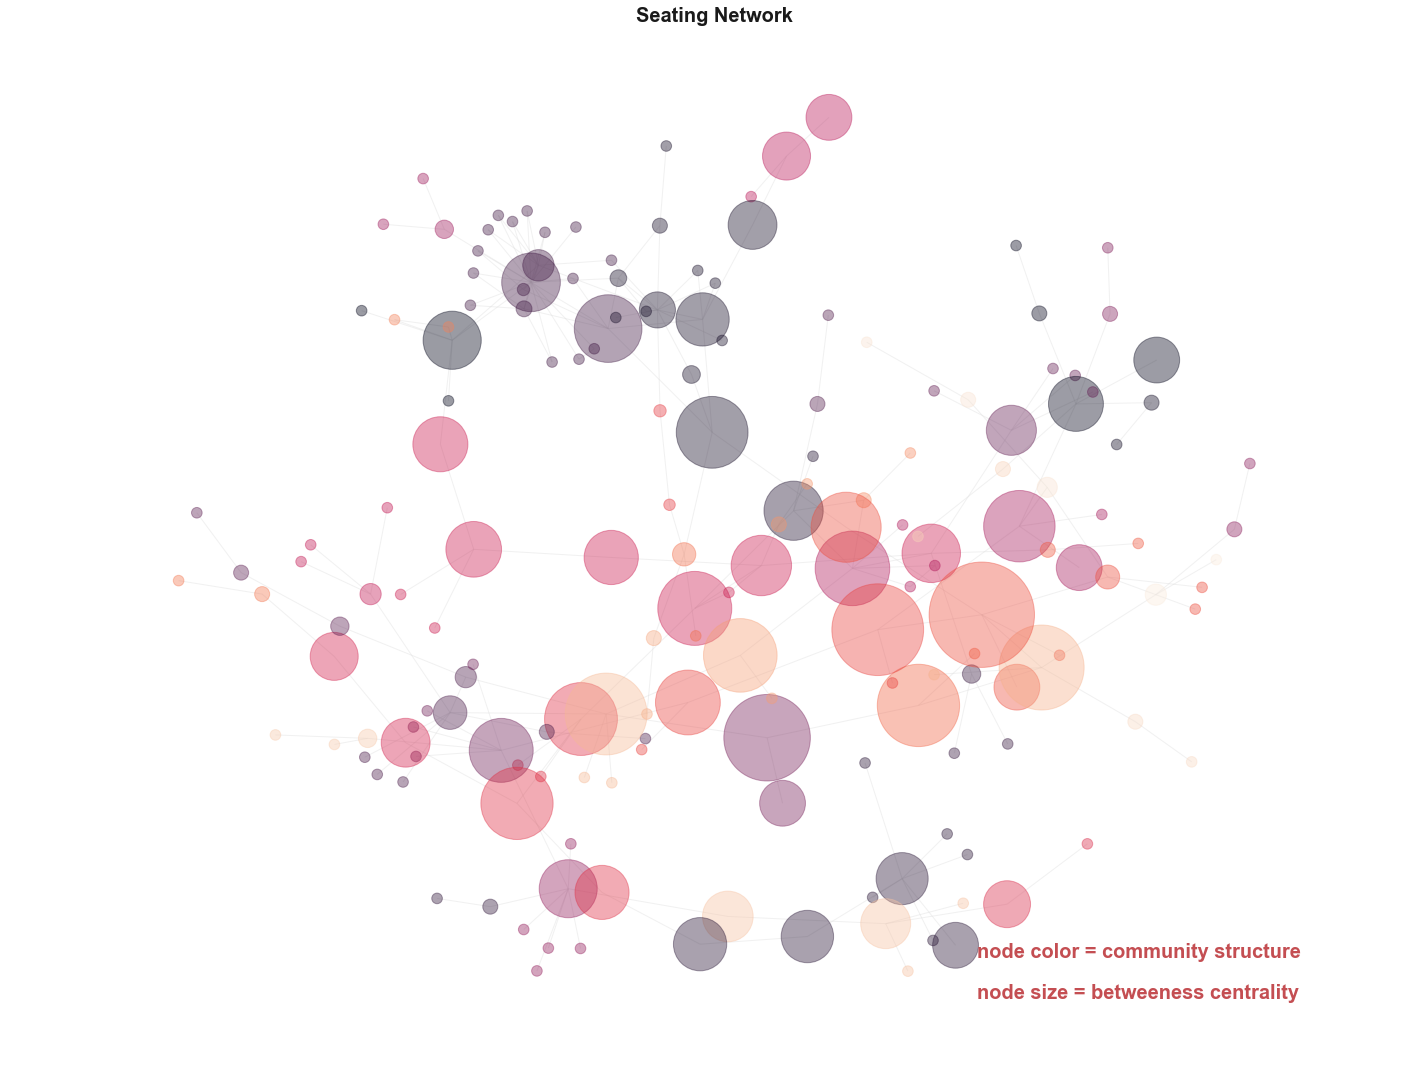

In [58]:
# largest connected component
components = nx.connected_components(G)
largest_component = max(components, key=len)
H = G.subgraph(largest_component)

# compute centrality
centrality = nx.betweenness_centrality(H, k=10, endpoints=True)

# compute community structure
lpc = nx.community.label_propagation_communities(H)
community_index = {n: i for i, com in enumerate(lpc) for n in com}

#### draw graph ####
fig, ax = plt.subplots(figsize=(20, 15))
pos = nx.spring_layout(H, k=0.15, seed=4572321)
node_color = [community_index[n] for n in H]
node_size = [v * 20000 for v in centrality.values()]
nx.draw_networkx(
    H,
    pos=pos,
    with_labels=False,
    node_color=node_color,
    node_size=node_size,
    edge_color="gainsboro",
    alpha=0.4,
)

# Title/legend
font = {"color": "k", "fontweight": "bold", "fontsize": 20}
ax.set_title("Seating Network", font)
# Change font color for legend
font["color"] = "r"

ax.text(
    0.80,
    0.10,
    "node color = community structure",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)
ax.text(
    0.80,
    0.06,
    "node size = betweeness centrality",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)

# Resize figure for label readibility
ax.margins(0.1, 0.05)
fig.tight_layout()
plt.axis("off")
plt.savefig(figures+"btw_community_seating_network.jpg",bbox_inches='tight')
plt.show()

In [59]:
data = nx.degree_centrality(G)

In [60]:
degree_df = pd.DataFrame(columns = ["judge", "degree_centrality"])
degree_df["judge"] = data.keys()
degree_df["degree_centrality"] = data.values()

In [61]:
degree_df = degree_df.sort_values(["degree_centrality"], ascending=False)

In [62]:
degree_df.head(20)

judge  degree_centrality
383     swatanter kumar           0.026247
425      v r kingaonkar           0.015748
331         arun mishra           0.013123
384           u d salvi           0.013123
124      t s sivagnanam           0.010499
342  ramesh ranganathan           0.009186
41         jasbir singh           0.009186
398      a m khanwilkar           0.009186
109                 NaN           0.009186
100        p sathasivam           0.009186
318         m s nambiar           0.009186
351  sanjay kishan kaul           0.009186
178           a k sikri           0.007874
355      rajendra menon           0.007874
668          i a ansari           0.007874
306         d h waghela           0.007874
724         d k agrawal           0.007874
45       s mukhopadhaya           0.007874
446          g k pandey           0.007874
121         r banumathi           0.007874

In [63]:
df_cases_cleaned.head()

Unnamed: 0 participant_label  Kanoon_ID                     Case id  \
0           0   valasa maharshi     1320.0    (2006) 104 TTJ Delhi 213   
1           1     aditya pandav     1569.0  WP(C).No. 21565 of 2009(M)   
2           2      surya sriram     7577.0                         NaN   
3           3          astha123    11626.0                1989 AIR 611   
4           4          astha123    14406.0            2004 (3) KLT 577   

           Judge 1     Judge 2 Judge 3  \
0          d singh  R c Sharma     NaN   
1           V.GIRI         NaN     NaN   
2  N Hanumanthappa     A Bhate     NaN   
3        Mukharjii  Sabyasachi   KANIA   
4         K B Nair         NaN     NaN   

                                         Petitioners  \
0                  Deputy Commissioner Of Income Tax   
1                                  THANKAMMA PAULOSE   
2  K. Srinivasan, Residents of Krishnapuri Colony...   
3  MEMBER-SECRETARY, ANDHRA PRADESH STATEBOARD FO...   
4                                              Soman   

                                         Respondents Is Appeal  \
0                             Saraya Industries Ltd.        no   
1             THE SECRETARY,KADAPRA GRAMA PANCHAYAT,        no   
2  Executive Officer, Cantonment, Kartik Construc...        no   
3                   Andhra Pradesh Rayons Ltd. & Ors        no   
4                                          Geologist        no   

  Is Constitutional Petitioner Advocate Respondent Advocate  \
0                no                  na                  na   
1                no      BABU CHERUKARA       No Appearance   
2                no                 NaN                 NaN   
3                no                 n.a                 n.a   
4               yes                 n.a                 n.a   

                                   Company           State   District  \
0                   Saraya Industries Ltd.    NCT of Delhi  New Delhi   
1                                      NaN             NaN        NaN   
2  Kartik Constructions of West Maredpalli  Andhra Pradesh  Hyderabad   
3                                      n.a    NCT of Delhi        n.a   
4                                      n.a          Kerala        n.a   

    Govt Role Social Impact   name_cleaned_1 name_cleaned_2 name_cleaned_3  \
0  petitioner            no          d singh     r c sharma            NaN   
1        none            no           v giri            NaN            NaN   
2        none           yes  n hanumanthappa        a bhate            NaN   
3  respondent           yes        mukharjii     sabyasachi          kania   
4        none           yes         k b nair            NaN            NaN   

                name_matched_1            name_matched_2 name_matched_3  \
0                    a d singh            r c deo sharma            NaN   
1                          NaN                       NaN            NaN   
2  nyaka yellapa hanumanthappa                       NaN            NaN   
3                          NaN  sabyasachi bhattacharyya        h kania   
4          k balakrishnan nair                       NaN            NaN   

  Year_judge_1 Data_Source_judge_1 Raw_biodata2017Handbooks_judge_1  \
0            .       State Website                              NaN   
1          NaN                 NaN                              NaN   
2            .       State Website                              NaN   
3          NaN                 NaN                              NaN   
4            .       State Website                              NaN   

  Raw_biodata2014Handbooks_judge_1  \
0                              NaN   
1                              NaN   
2                              NaN   
3                              NaN   
4                              NaN   

                              Raw_biowebsite_judge_1 State_y_judge_1  \
0  Justice Anil Dev Singh, BSc., LL.B. - Born on ...           Delhi   
1                                

## 5. What is the right way to segregate cases?

In [64]:
df_cases_cleaned = pd.merge(df_cases_cleaned, df_citations,left_on = "Kanoon_ID" ,right_on = "kanoon_id", how='left')

In [65]:
df_temp = pd.DataFrame(columns = ["value", "type"])

In [66]:
df_imp = pd.DataFrame()
df_imp["value"] = df_cases_cleaned["importance_score"]
normalized_df_imp=(df_imp-df_imp.mean())/df_imp.std()
normalized_df_imp["type"] = "importance score"
list_normalized_imp_scores = list(normalized_df_imp["value"])


df_len = pd.DataFrame()
df_len["value"] = df_cases_cleaned["length_of_case"]
normalized_df_len=(df_len-df_len.mean())/df_len.std()
normalized_df_len["type"] = "length"
list_normalized_len = list(normalized_df_len["value"])

df_acts = pd.DataFrame()
df_acts["value"] = df_cases_cleaned["num_titles_cited"]
normalized_df_acts=(df_acts-df_acts.mean())/df_acts.std()
normalized_df_acts["type"] = "acts cited"
list_normalized_acts = list(normalized_df_acts["value"])


df_cites = pd.DataFrame()
df_cites["value"] = df_cases_cleaned["num_cites"]
normalized_df_cites=(df_cites-df_cites.mean())/df_cites.std()
normalized_df_cites["type"] = "citations to the case"
list_normalized_cites = list(normalized_df_cites["value"])

In [67]:
df_temp = pd.concat([normalized_df_imp,normalized_df_len,normalized_df_acts,normalized_df_cites], axis=0)
df_temp = df_temp.reset_index(drop=True)

In [68]:
plt.rcParams["figure.figsize"] = (10,5)

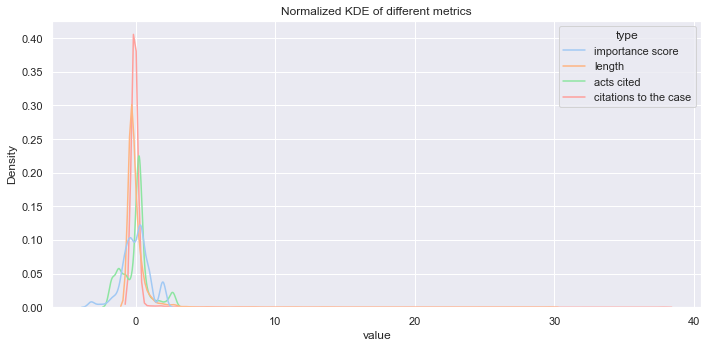

In [69]:
f = sns.kdeplot(data=df_temp, x="value", hue = "type").set(title="Normalized KDE of different metrics")
plt.tight_layout()
#f = fig.get_figure()
plt.savefig(figures+"combined_kde.jpg")
plt.show()

In [70]:
from statsmodels.stats.weightstats import ztest as ztest

In [71]:
#perform two sample z-test
ztest(list_normalized_imp_scores, list_normalized_len, value=0)

(1.425542624560291e-14, 0.9999999999999887)

In [72]:
#perform two sample z-test
ztest(list_normalized_imp_scores, list_normalized_acts, value=0)

(8.27734427164043e-15, 0.9999999999999934)

In [73]:
#perform two sample z-test
ztest(list_normalized_imp_scores, list_normalized_cites, value=0)

(1.287586886699599e-14, 0.9999999999999897)

In [74]:
# cannot reject null in all --  ergo normalized importance score is not significantly different than othermetrics (normalized)

# Analysing Parties

In [75]:
df_cases_cleaned["petitioner_cleaned"] = df_cases_cleaned["Petitioners"].apply(lambda x : str(x).lower())

In [76]:
df_cases_cleaned["respondent_cleaned"] = df_cases_cleaned["Respondents"].apply(lambda x : str(x).lower())

In [77]:
df_cases_cleaned

Unnamed: 0   participant_label    Kanoon_ID  \
0              0     valasa maharshi       1320.0   
1              1       aditya pandav       1569.0   
2              2        surya sriram       7577.0   
3              3            astha123      11626.0   
4              4            astha123      14406.0   
...          ...                 ...          ...   
1905        1905       maahira jalan  198654408.0   
1906        1906          aditya das  198796622.0   
1907        1907             Amala L  199228395.0   
1908        1908      Raksha Sathish  199426007.0   
1909        1909  sharwari dharaskar  199641289.0   

                                                Case id  \
0                              (2006) 104 TTJ Delhi 213   
1                            WP(C).No. 21565 of 2009(M)   
2                                                   NaN   
3                                          1989 AIR 611   
4                                      2004 (3) KLT 577   
...                                                 ...   
1905                             A.B.A.No. 4916 of 2016   
1906  W.P.(C) Nos.11575, 10325, 10345, 10393, 10394,...   
1907                                      51739 OF 2012   
1908                                      No.10014/2009   
1909                                      33214 of 2019   

                    Judge 1          Judge 2 Judge 3  \
0                   d singh       R c Sharma     NaN   
1                    V.GIRI              NaN     NaN   
2           N Hanumanthappa          A Bhate     NaN   
3                 Mukharjii       Sabyasachi   KANIA   
4                  K B Nair              NaN     NaN   
...                     ...              ...     ...   
1905      Anant Bijay Singh              NaN     NaN   
1906             S.N.Prasad      Sanju Panda     NaN   
1907  Jawad Rahimawad Rahim  V Suri Appa Rao     NaN   
1908     Prem Shanker Asopa              NaN     NaN   
1909   Pankaj Kumar Jaiswal      alok mathur     NaN   

                                            Petitioners  \
0                     Deputy Commissioner Of Income Tax   
1                                     THANKAMMA PAULOSE   
2     K. Srinivasan, Residents of Krishnapuri Colony...   
3     MEMBER-SECRETARY, ANDHRA PRADESH STATEBOARD FO...   
4                                                 Soman   
...                                                 ...   
1905                                    Kripakar Mahato   
1906                                        Kalia Sethi   
1907                               Vishwas Construction   
1908                        M/S Bhole Baba Griti Udhyog   
1909                            Kirori Lal Cold Storage   

                                            Respondents Is Appeal  \
0                                Saraya Industries Ltd.        no   
1                THE SECRETARY,KADAPRA GRAMA PANCHAYAT,        no   
2     Executive Officer, Cantonment, Kartik Construc...        no   
3                      Andhra Pradesh Rayons Ltd. & Ors        no   
4                                             Geologist        no   
...                                                 ...       ...   
1905                             The State of Jharkhand        no   
1906                                    State of Odisha        no   
1907  Department of Mines and Geology, State Of Karn...       yes   
1908                  Raj State Pollution Control Board        no   
1909                                      State Of U.P.        no   

     Is Constitutional                                Petitioner Advocate  \
0                   no                                                 na   
1                   no                                     BABU CHERUKARA   
2                   no                                                NaN   
3                   no                                                n.a   
4                  yes                                          

In [78]:
df_pet = pd.DataFrame(data = FreqDist(df_cases_cleaned["petitioner_cleaned"]).most_common(30),
                      columns = ["petitioner", "frequency"])

In [79]:
df_res = pd.DataFrame(data = FreqDist(df_cases_cleaned["respondent_cleaned"]).most_common(30),
                      columns = ["respondent", "frequency"])

In [80]:
df_pet

petitioner  frequency
0                     gujarat pollution control board         22
1                                          m.c. mehta         14
2                                                 nan         10
3                   delhi pollution control committee          6
4                  tamil nadu pollution control board          4
5                          dahyabhai kalubhai solanki          4
6                                                   -          4
7                                             unknown          4
8                                            j. mehta          4
9                           harkishan ramniklal joshi          3
10                                     tileshwar sahu          3
11                       u.p. pollution control board          3
12                             bahubali stone crusher          3
13              haryana state pollution control board          3
14                                      maneka gandhi          3
15                 bombay suburban khatik association          3
16  ranjana jetley, harsaran bir kaur pandey, sudh...          3
17                                      darshan singh          3
18        mayflower sakthi garden owners' association          3
19             madhya pradesh pollution control board          3
20                            salimullah, saroj kumar          3
21                                         om prakash          3
22                            court on its own motion          3
23                                    v. lakshmipathy          2
24                               larsen & toubro ltd.          2
25                                       annie thomas          2
26                          akhil bharat goseva sangh          2
27                    bombay environment action group          2
28    gujarat pollution control board thro r.h. bhati          2
29                                       k.m. vijayan          2

In [81]:
df_res

respondent  frequency
0                            the state of bihar         62
1                        the state of jharkhand         52
2                                union of india         46
3                               state of punjab         30
4                              state of gujarat         27
5                            state of jharkhand         23
6                                state of bihar         21
7       rajasthan state pollution control board         19
8                              state of haryana         18
9                                           nan         18
10                                state of u.p.         17
11                           state of karnataka         17
12      karnataka state pollution control board         14
13                              state of kerala         12
14                           state of rajasthan         11
15                         state of maharashtra         10
16        haryana state pollution control board         10
17              gujarat pollution control board         10
18                  the state of madhya pradesh         10
19  the karantaka state pollution control board          9
20                                 state of u.p          8
21               punjab pollution control board          8
22                 m.p. pollution control board          8
23                                  state of hp          8
24  the karnataka state pollution control board          8
25                        union of india & ors.          7
26                       state of uttar pradesh          7
27                         state of west bengal          7
28       madhya pradesh pollution control board          7
29            delhi pollution control committee          6

/var/folders/k6/kx_d1qpd6gj70c1ws8h73n2r0000gn/T/ipykernel_19630/55776490.py:3: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


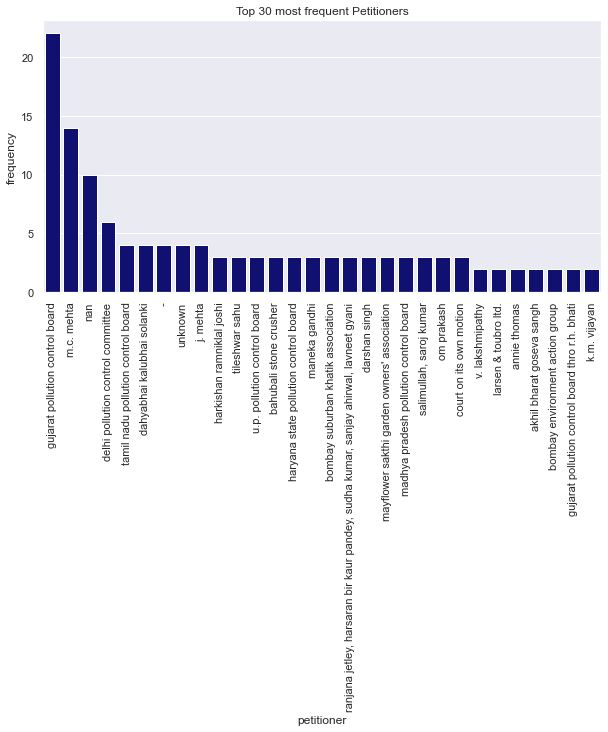

In [82]:
f=sns.barplot(data = df_pet, x = df_pet.petitioner, y = df_pet.frequency, color = "navy").set(title="Top 30 most frequent Petitioners")
plt.xticks(rotation=90)
plt.tight_layout()
#f = fig.get_figure()
plt.savefig(figures+"top20petitioners.jpg")
plt.show()

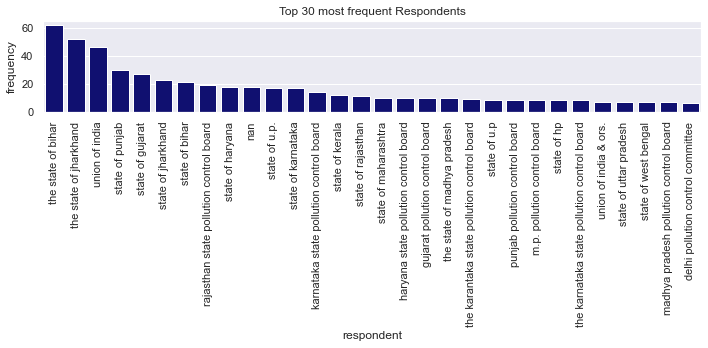

In [83]:
f=sns.barplot(data = df_res, x = df_res.respondent, y = df_res.frequency, color = "navy").set(title="Top 30 most frequent Respondents")
plt.xticks(rotation=90)
plt.tight_layout()
#f = fig.get_figure()
plt.savefig(figures+"top20respondents.jpg")
plt.show()

In [84]:
years = list(df_cases_cleaned["delivery_year"].unique())

In [85]:
list_ = []
list_2 = []
for year in years:
    
    list_.append(len(df_cases_cleaned[df_cases_cleaned["delivery_year"]==year]))
    list_2.append(len(df_cases_cleaned[(df_cases_cleaned["delivery_year"]==year) & (df_cases_cleaned["mean_coded_vals"]>0)]))
    
    

In [86]:
df_year = pd.DataFrame()

In [87]:
df_year["year"] = years
df_year["number of cases"] = list_
df_year["number of green cases"] = list_2

In [88]:
df_year = df_year.sort_values(["year"])

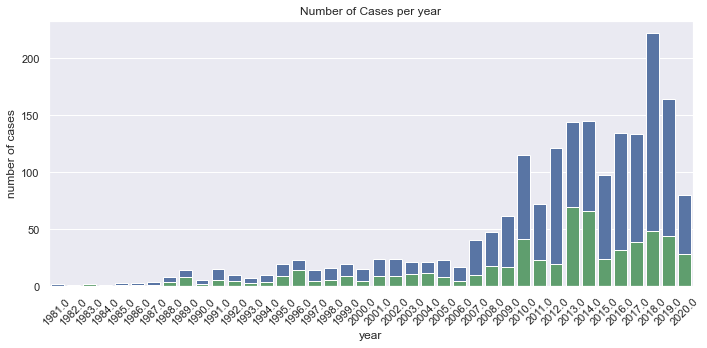

In [89]:

# creating subplots
ax = plt.subplots()
 
# plotting columns
ax = sns.barplot(x=df_year["year"], y=df_year["number of cases"], color='b')
ax = sns.barplot(x=df_year["year"], y=df_year["number of green cases"], color='g')
 
# renaming the axes
ax.set(xlabel="year", ylabel="number of cases", title="Number of Cases per year")
 
# visualizing illustration
plt.xticks(rotation=45)
plt.tight_layout()
#f = fig.get_figure()
plt.savefig(figures+"casesperyear.jpg")
plt.show()

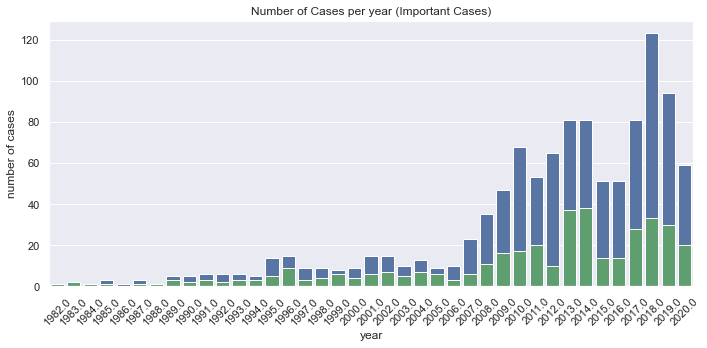

In [90]:
years = list(df_cases_cleaned_only_important["delivery_year"].unique())
list_ = []
list_2 = []
for year in years:
    
    list_.append(len(df_cases_cleaned_only_important[df_cases_cleaned_only_important["delivery_year"]==year]))
    list_2.append(len(df_cases_cleaned_only_important[(df_cases_cleaned_only_important["delivery_year"]==year) & (df_cases_cleaned_only_important["mean_coded_vals"]>0)]))
    
    

df_year = pd.DataFrame()

df_year["year"] = years
df_year["number of cases"] = list_
df_year["number of green cases"] = list_2

df_year = df_year.sort_values(["year"])

# creating subplots
ax = plt.subplots()
 
# plotting columns
ax = sns.barplot(x=df_year["year"], y=df_year["number of cases"], color='b')
ax = sns.barplot(x=df_year["year"], y=df_year["number of green cases"], color='g')
 
# renaming the axes
ax.set(xlabel="year", ylabel="number of cases", title="Number of Cases per year (Important Cases)")
 
# visualizing illustration
plt.xticks(rotation=45)
plt.tight_layout()
#f = fig.get_figure()
plt.savefig(figures+"casesperyear_imp.jpg")
plt.show()

In [91]:
df_kerala = df_cases_cleaned[df_cases_cleaned["state"]=="kerala"]

In [92]:
len(df_kerala)

152

In [93]:
FreqDist(df_kerala["petitioner_cleaned"]).most_common(30)

[('annie thomas', 2),
 ('krishnankutty.r', 2),
 ('wilfred j., marydasan v.', 2),
 ('soman', 1),
 ('ncj rajan, john neroth, john mathew, john chacko', 1),
 ('r. balakrishna pillai', 1),
 ('k.l.cyril', 1),
 ('g. jayaprakash', 1),
 ('m.r. pillai', 1),
 ('tata teleservices limited', 1),
 ('k.p. anilkumar', 1),
 ('gwalior rayon silk mfg. (wvg) co', 1),
 ('executive engineer, attappady valley irrigation project', 1),
 ('kothamangalam pollution control club', 1),
 ('k.rahmathulla,', 1),
 ('v.s. damodaran nair', 1),
 ('r gokul prasad', 1),
 ('thressiamma alias valsamma', 1),
 ('rajan', 1),
 ('y.hussain, velladan abdul nazar', 1),
 ('nabum, district collector, collectorate, r.d.o. fort kochi, district medical officer, ernakulam, secretary, elamkunnapuzha panchayath, m/s.afcon infrastructure ltd',
  1),
 ('sujatha', 1),
 ('harrisons malayalam limited', 1),
 ('arivazhakan.c., anand', 1),
 ('bharti air tel ltd', 1),
 ('v antony, state bank if india', 1),
 ('the addl.chief secy.,govt.of kerala', 1)

In [94]:
FreqDist(df_kerala["respondent_cleaned"]).most_common(30)

[('state of kerala', 10),
 ('kerala state pollution control board', 3),
 ('state of kerala and ors.', 2),
 ('sabu thozhuppadan, state of kerala', 2),
 ('ministry of environment & forests, state of kerala, vizhinjam international seaport ltd., national coastal zone management authority',
  2),
 ('the state of kerala', 2),
 ('geologist', 1),
 ('p.k.kumudini, m.p.souro, n.j.chacko, francis job neroth', 1),
 ('state of kerala and anr.', 1),
 ('state of kerala, kerala state pollution control board', 1),
 ('executive officer, pathiyoor', 1),
 ('the ombudsman for local self', 1),
 ('state of kerala and others', 1),
 ('sub inspector of police, state of kerala', 1),
 ('appellate committee for water', 1),
 ('environmental and ecological protection samithy, agali', 1),
 ('kothamangalam municipality, chief environmental engineer', 1),
 ('the cherukavu grama panchayath, the senior environmental engineer, the district medical officer, alapatta muhammed',
  1),
 ('hindustan coco-cola, sanjeev gupta, 

In [95]:
df_bihar = df_cases_cleaned[df_cases_cleaned["state"]=="bihar"]

In [96]:
FreqDist(df_bihar["petitioner_cleaned"]).most_common(30)

[('salimullah, saroj kumar', 3),
 ('larsen & toubro ltd.', 2),
 ('dheeraj kumar', 2),
 ('ram chandra yadav', 2),
 ('ruby singh', 2),
 ('narendra mishra', 2),
 ('om prakash dhanuka', 2),
 ('purushottam kumar', 2),
 ('saroj kumar singh', 2),
 ('pawan stone works and ors', 1),
 ('badri prasad gupta and ors', 1),
 ('bihar state pollution control board', 1),
 ('arvind kumar singh @ arvind singh', 1),
 ('hari charan singh dugal and ors.', 1),
 ('h.m.p. cements ltd.', 1),
 ('shankar pd. barnwal & ors.', 1),
 ('tata iron & steel co. ltd.', 1),
 ('national insurance company ltd', 1),
 ('mahmud ali', 1),
 ('bitu kumar', 1),
 ('z. kotasek', 1),
 ('eagle ceramic', 1),
 ('tata engineering and locomotive', 1),
 ('jugal kishore modi', 1),
 ('satyendra pandey', 1),
 ('jamuna flour and oil mills', 1),
 ('rajiv ranjan singh', 1),
 ('ajay kumar sarawgi, ramesh chandra patel;, ganesh pd. sarawgi, prabhash chandra jaiswal , samir kumar mitra',
  1),
 ('bihar foundary and castings ltd.', 1),
 ('raj kishore 

In [97]:
FreqDist(df_bihar["respondent_cleaned"]).most_common(30)

[('the state of bihar', 56),
 ('state of bihar', 18),
 ('the state of bihar & ors', 4),
 ('the state of bihar, the principal secretary cum commissioner department of mines and geology',
  4),
 ('state of bihar, bihar state pollution control board', 3),
 ('the state of bihar and ors.', 2),
 ('state of bihar and ors.', 2),
 ('the state of bihar, the principal secretary cum commissioner, department of mines and geology',
  2),
 ('bihar state pollution control board', 2),
 ('nan', 2),
 ('the state of bihar.', 2),
 ('state of bihar, deputy commissioner of commercial taxes, barauni', 1),
 ('state of bihar and anr', 1),
 ('hiranand stone works', 1),
 ('state of bihar, bihar state water pollution control and prevention board, member secretary, bihar state water pollution and prevention board, union of india',
  1),
 ('narendra kumar jhanjhri', 1),
 ('secretary department of forest & environment, bihar, bihar state pollution control board, subodh kumar jha',
  1),
 ('bihar state pollution contr

In [98]:
df_tamilnadu = df_cases_cleaned[df_cases_cleaned["state"]=="tamil nadu"]

In [99]:
len(df_tamilnadu)

175

In [100]:
FreqDist(df_tamilnadu["petitioner_cleaned"]).most_common(30)

[('tamil nadu pollution control board', 3),
 ("mayflower sakthi garden owners' association", 3),
 ('k.m. vijayan', 2),
 ('n. doraisamy', 2),
 ('suriyur vivasayigal pathukappu sangam', 2),
 ('m. saraswathi', 2),
 ('n.a, n.a', 1),
 ('tamil nadu pollution control', 1),
 ("anaimalai national estate, anaimalai ambedkhar thotta, anaimalai dravida thozhilalar, tamil nadu plantation worker's union, edayadeivam m.g.r. thotta thozhilalar sangam",
  1),
 ("anaimalai national estate workers' union, anaimalai ambedkhar thotta makkal sangam, anaimalai dravida thozhilalar munnetra sangam (lpf), tamil nadu plantation worker's union, edayadeivam m.g.r.thotta thozhilalar sangam",
  1),
 ('supreme poultry private limited', 1),
 ('k.marappan', 1),
 ('balasubramaniam s', 1),
 ('ganapathysubramanian', 1),
 ('b.k. madhavan, bank of thanjavur', 1),
 ('nadar mahajana sangam', 1),
 ('suriya sweets rep by its partner', 1),
 ('s. jagannath', 1),
 ('the perundurai citizens welfare society', 1),
 ('tamil nadu petro

In [101]:
FreqDist(df_tamilnadu["respondent_cleaned"]).most_common(30)

[('union of india', 3),
 ('tamil nadu', 3),
 ('nan', 2),
 ('archana enterprises', 2),
 ('tamil nadu pollution control', 2),
 ('ministry of environment and forest, tamil nadu pollution control board, district environmental engineer',
  2),
 ('n.a', 1),
 ('melo leather manufacturers', 1),
 ("the planter's association of tamil nadu, stanmore estate, injiparai estate, siricundra estate, panchamalai estate, valparai estate, veloni estate, urilikal estate, pannimedu estate, sholayar estate",
  1),
 ("planter's association of tamil nadu, stanmore estate, injiparai estate, siricundra estate, panchamalai estate, valparai estate, veloni estate, urilikal estate, pannimedu estate, sholayar estate",
  1),
 ('the district collector-cum- inspector of panchayats, the president, kodanthur village panchayat',
  1),
 ('the deputy registrar of co-operative societies,, the special officer,', 1),
 ('government of tamil nadu', 1),
 ('mayiladuthurai municipality', 1),
 ('the state human rights commission, ass

## Analysing Firms

In [102]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shashanksingh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [103]:

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))

In [104]:
df_cases_cleaned = pd.read_csv(root+"case_data_final_with_additional_variables.csv")
df_citations = pd.read_csv(raw+"cites_air_cases.csv")

In [105]:
df_cases_cleaned = pd.merge(df_cases_cleaned, df_citations,left_on = "Kanoon_ID" ,right_on = "kanoon_id", how='left')

In [106]:
#df_cases_cleaned.head()

In [107]:
parties = list(df_cases_cleaned["Petitioners"].unique())+list(df_cases_cleaned["Respondents"].unique())

In [108]:
parties = [str(ele).lower() for ele in parties]

In [109]:
parties_str = " ".join(ele for ele in parties if ele not in stop_words)

In [110]:
parties_words = parties_str.split()

In [111]:
freq = FreqDist(parties_words).most_common()

In [112]:
private_firms = ["ltd", "pvt", "private", "limited", "industry",
                 "company", "enterprise", "m/s", "industries",
                 "corporation", "mines", "udhyog",
                 "products", "mineral", "realtor", "steel", "iron",
                 "mine", "pharma", "technology", "bank", "distillery", 
                 "hotel", "software", "logistic", "finance"]

mining_metals = ["mine", "mineral", "iron", "steel", "mining"]





In [113]:
def matcher(list_, str_):
    
    flag = 0
    
    str_ = str(str_).lower()
    
    for ele in list_:
        
        if ele in str_:
            
            flag = 1
            break
            
    return flag
        

In [114]:
df_cases_cleaned["petitioner_private_firm_dummy"] = df_cases_cleaned["Petitioners"].apply(lambda x : matcher(private_firms, x))

In [115]:
df_cases_cleaned["respondent_private_firm_dummy"] = df_cases_cleaned["Respondents"].apply(lambda x : matcher(private_firms, x))

In [116]:
df_cases_cleaned["petitioner_mining_firm_dummy"] = df_cases_cleaned["Petitioners"].apply(lambda x : matcher(mining_metals, x))

df_cases_cleaned["respondent_mining_firm_dummy"] = df_cases_cleaned["Respondents"].apply(lambda x : matcher(mining_metals, x))

In [117]:
private_petitioners = list(df_cases_cleaned[df_cases_cleaned["petitioner_private_firm_dummy"]==1]["Petitioners"])
private_petitioners = [ele.lower() for ele in private_petitioners]
private_respondents = list(df_cases_cleaned[df_cases_cleaned["respondent_private_firm_dummy"]==1]["Respondents"])
private_respondents = [ele.lower() for ele in private_respondents]

In [118]:
mining_petitioners = list(df_cases_cleaned[df_cases_cleaned["petitioner_mining_firm_dummy"]==1]["Petitioners"])
mining_petitioners = [ele.lower() for ele in mining_petitioners]
mining_respondents = list(df_cases_cleaned[df_cases_cleaned["respondent_mining_firm_dummy"]==1]["Respondents"])
mining_respondents = [ele.lower() for ele in mining_respondents]

In [119]:
FreqDist(mining_respondents).most_common()

[('the state of bihar, the principal secretary cum commissioner department of mines and geology',
  4),
 ('tamil nadu pollution control board, the district environmental engineer',
  2),
 ('ministry of environment and forests', 2),
 ('the state of bihar, the principal secretary cum commissioner, department of mines and geology',
  2),
 ('ministry of environment & forests, state of kerala, vizhinjam international seaport ltd., national coastal zone management authority',
  2),
 ('ministry of environment and forest, tamil nadu pollution control board, district environmental engineer',
  2),
 ('environmental and ecological protection samithy, agali', 1),
 ('chhatishgarh environment conservation board', 1),
 ('kothamangalam municipality, chief environmental engineer', 1),
 ('the cherukavu grama panchayath, the senior environmental engineer, the district medical officer, alapatta muhammed',
  1),
 ('tamil nadu pollution control board, the district environmental engineer, tamil nadu pollutio

In [120]:
FreqDist(mining_petitioners).most_common()

[('bombay environment action group', 2),
 ('electrosteel steels limited', 2),
 ('m.k.overseas pvt. ltd. , village welfare & environment bachao committee, samgoli.',
  1),
 ('ajay dubey, madhya pradesh state mining corporation ltd.', 1),
 ('tata iron & steel co. ltd.', 1),
 ('m/s jindal vijayanagar steels ltd, -, -, -', 1),
 ('sumangala steels ltd.', 1),
 ('environsare foundation', 1),
 ('bombay environmental action commission', 1),
 ('bombay environmental action', 1),
 ('sumangala steels limited', 1),
 ('indian council for environment legal action', 1),
 ('t.n.s.s.steels pvt. ltd', 1),
 ('anand mining corporation', 1),
 ('sainik mining and allied services ltd.', 1),
 ('jay durga minerals', 1),
 ('ramky energy and environment ltd', 1),
 ('renaissance steel india pvt. ltd. , larsen & toubro ltd. , brij bhushan singal',
  1),
 ('andhra pradesh pollution control board, the joint chief environmental engineer',
  1),
 ('sri hardev steels private limited', 1),
 ('sri lakshmi minerals', 1),
 (

In [121]:
FreqDist(private_petitioners).most_common()

[('larsen & toubro ltd.', 2),
 ('bombay environment action group', 2),
 ('oswal agricomm pvt ltd', 2),
 ('rao jogendra grit udhyog', 2),
 ('federal bank ltd.', 2),
 ('electrosteel steels limited', 2),
 ('kale entertainment and resorts pvt. ltd., vanashakti public trust', 2),
 ('divya granites, maruthi packaging industries, sree maruthi granites, sree byraveshwara granites, rajashree rocks, navarathna granites, matheswari granites, lakshmi narasimha granites, shree sakthi enterprises, shree ohm shakthi granitess',
  2),
 ('m/s bahubali stone crusher', 2),
 ('indian rare earths limited', 2),
 ('hotel asian plaza', 2),
 ('m/s. divya granites, m/s. maruthi packaging industries, m/s. sree maruthi granites, m/s. sree byraveshwara granites, m/s. rajashree rocks, m/s. navarathna granites, m/s. matheswari granites, m/s. lakshmi narasimha granites, m/s. shree sakthi enterprises, m/s. shree ohm shakthi granitess',
  2),
 ('divya granites, maruthi packaging industries, sree maruthi granites', 2),


In [122]:
FreqDist(private_respondents).most_common()

[('the state of bihar, the principal secretary cum commissioner department of mines and geology',
  4),
 ('saraya industries ltd.', 2),
 ('tamil nadu pollution control board, the district environmental engineer',
  2),
 ('archana enterprises', 2),
 ('puma realtors pvt. ltd.', 2),
 ('ministry of environment and forests', 2),
 ('the state of bihar, the principal secretary cum commissioner, department of mines and geology',
  2),
 ('puma realtors private limited', 2),
 ('ministry of environment & forests, state of kerala, vizhinjam international seaport ltd., national coastal zone management authority',
  2),
 ('ministry of environment and forest, tamil nadu pollution control board, district environmental engineer',
  2),
 ('the sherwood officers society, praneet bhardwaj, parampal singh sidhu, rkm housing ltd',
  2),
 ('andhra pradesh rayons ltd. & ors', 1),
 ('rushabh industries', 1),
 ('arun industries , & 2 ors.', 1),
 ('state of gujarat , sunchem industries', 1),
 ('vyankatesh co-ope

In [123]:
private_parties = private_petitioners+private_respondents

In [124]:
private_parties_str = " ".join(ele for ele in private_parties)

In [125]:
private_parties_split = private_parties_str.split()

In [126]:
FreqDist(private_parties_split).most_common()

[('the', 662),
 ('of', 594),
 ('state', 387),
 ('pollution', 360),
 ('control', 350),
 ('board,', 280),
 ('m/s', 183),
 ('and', 179),
 ('ltd.', 144),
 (',', 139),
 ('district', 130),
 ('environmental', 109),
 ('stone', 109),
 ('&', 108),
 ('environment', 104),
 ('limited', 103),
 ('m/s.', 96),
 ('industries', 96),
 ('secretary,', 91),
 ('tamil', 87),
 ('ltd', 85),
 ('engineer,', 84),
 ('corporation', 80),
 ('nadu', 79),
 ('karnataka', 79),
 ('board', 77),
 ('department', 75),
 ('pvt.', 73),
 ('municipal', 72),
 ('officer,', 69),
 ('chief', 65),
 ('engineer', 63),
 ('deputy', 63),
 ('electricity', 61),
 ('mines', 60),
 ('ltd.,', 59),
 ('udhyog', 54),
 ('kerala', 54),
 ('india', 53),
 ('grit', 53),
 ('commissioner', 53),
 ('union', 51),
 ('principal', 51),
 ('commissioner,', 50),
 ('supply', 50),
 ('granites,', 49),
 ('ministry', 49),
 ('secretary', 49),
 ('india,', 48),
 ('bihar,', 48),
 ('executive', 47),
 ('government', 46),
 ('private', 45),
 ('limited,', 45),
 ('crusher,', 43),
 ('c

In [127]:
a = pd.DataFrame(G.degree())

In [128]:
# average degree
a[1].mean()

1.7011795543905637

In [129]:
judges = list(df_judges["judge"].unique())

In [130]:
len(judges)

792

In [131]:
# cases per judge
len(df_cases_cleaned)/len(judges)

2.4116161616161618

# Further Analysis

## 1. MOST CITED JUDGES, 

In [132]:
len(df_cases_cleaned)

1910

In [133]:
j1_tup = list(zip(df_cases_cleaned["name_cleaned_1"], df_cases_cleaned["num_cites"]))
j2_tup = list(zip(df_cases_cleaned["name_cleaned_2"], df_cases_cleaned["num_cites"]))
j3_tup = list(zip(df_cases_cleaned["name_cleaned_3"], df_cases_cleaned["num_cites"]))
j_tup = j1_tup+j2_tup+j3_tup

In [134]:
df_jcit = pd.DataFrame(data = j_tup, columns = ["judge", "num_cites"])
df_jcit = df_jcit.dropna()

In [135]:
num_cites = df_jcit.groupby(["judge"]).agg(["mean"])["num_cites"].reset_index(drop=False)

In [136]:
num_cites = num_cites.sort_values(["mean"], ascending=False).reset_index(drop=True)

In [137]:
num_cites["Average number of citations"] = num_cites["mean"]

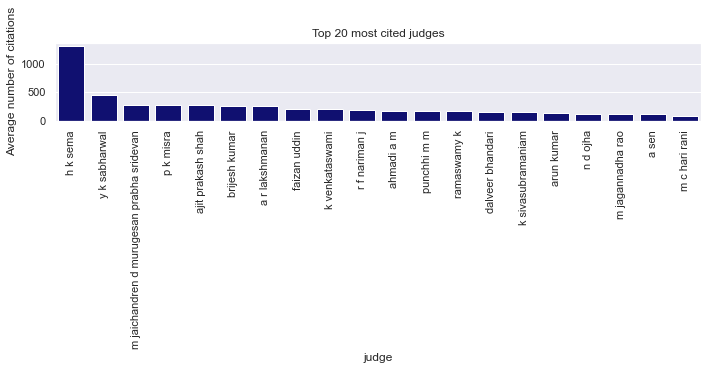

In [138]:
f=sns.barplot(data = num_cites, x = num_cites[:20].judge, y = num_cites["Average number of citations"][:20], color = "navy").set(title="Top 20 most cited judges")
plt.xticks(rotation=90)
plt.tight_layout()
#f = fig.get_figure()
plt.savefig(figures+"top20citedjudges.jpg")
plt.show()

## 2. Number of Citations per state, 

In [139]:
states_tup = list(zip(df_cases_cleaned["state"], df_cases_cleaned["num_cites"]))

In [140]:
df_statecit = pd.DataFrame(data = states_tup, columns = ["state", "num_cites"])
df_statecit = df_statecit.dropna()

In [141]:
num_cites = df_statecit.groupby(["state"]).agg(["mean"])["num_cites"].reset_index(drop=False)

In [142]:
num_cites = num_cites.sort_values(["mean"], ascending=False).reset_index(drop=True)

In [143]:
num_cites["Average number of citations"] = num_cites["mean"]

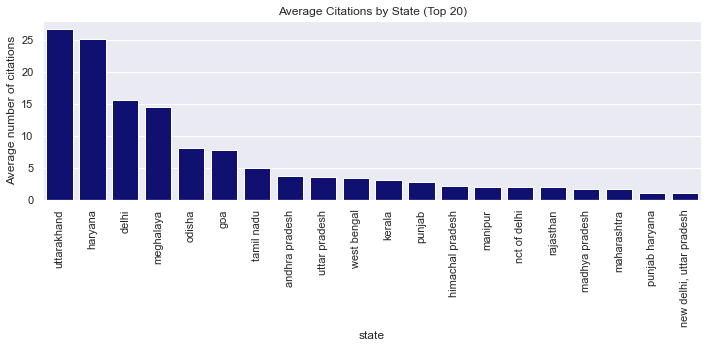

In [144]:
f=sns.barplot(data = num_cites, x = num_cites[:20].state, y = num_cites["Average number of citations"][:20], color = "navy").set(title="Average Citations by State (Top 20)")
plt.xticks(rotation=90)
plt.tight_layout()
#f = fig.get_figure()
plt.savefig(figures+"top20citedstates.jpg")
plt.show()

## 3. Are green cases cited more?

In [145]:
df_cases_cleaned["Green Case"] = df_cases_cleaned["mean_coded_vals"].apply(lambda x : "Green" if x>0 else "Non-Green")

In [146]:
green_tup = list(zip(df_cases_cleaned["Green Case"], df_cases_cleaned["num_cites"]))

In [147]:
df_greencit = pd.DataFrame(data = green_tup, columns = ["Green Case", "num_cites"])
df_greencit = df_greencit.dropna()

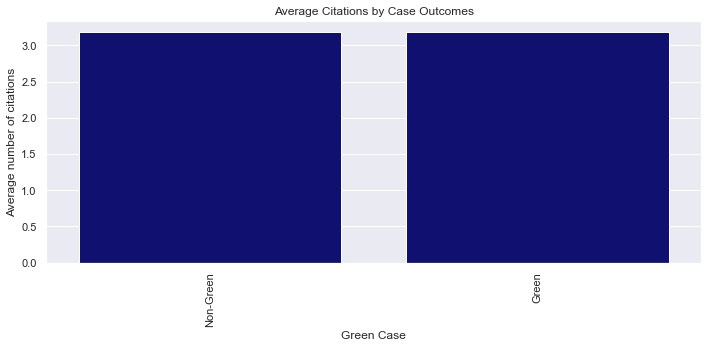

In [148]:
num_cites = df_greencit.groupby(["Green Case"]).agg(["mean"])["num_cites"].reset_index(drop=False)

num_cites = num_cites.sort_values(["mean"], ascending=False).reset_index(drop=True)

num_cites["Average number of citations"] = num_cites["mean"]

f=sns.barplot(data = num_cites, x = num_cites["Green Case"], y = num_cites["Average number of citations"], color = "navy").set(title="Average Citations by Case Outcomes")
plt.xticks(rotation=90)
plt.tight_layout()
#f = fig.get_figure()
plt.savefig(figures+"greencitations.jpg")
plt.show()

## 6. state wise number of private petitioners/respondents

In [149]:
df_cases_cleaned

Unnamed: 0   participant_label    Kanoon_ID  \
0              0     valasa maharshi       1320.0   
1              1       aditya pandav       1569.0   
2              2        surya sriram       7577.0   
3              3            astha123      11626.0   
4              4            astha123      14406.0   
...          ...                 ...          ...   
1905        1905       maahira jalan  198654408.0   
1906        1906          aditya das  198796622.0   
1907        1907             Amala L  199228395.0   
1908        1908      Raksha Sathish  199426007.0   
1909        1909  sharwari dharaskar  199641289.0   

                                                Case id  \
0                              (2006) 104 TTJ Delhi 213   
1                            WP(C).No. 21565 of 2009(M)   
2                                                   NaN   
3                                          1989 AIR 611   
4                                      2004 (3) KLT 577   
...                                                 ...   
1905                             A.B.A.No. 4916 of 2016   
1906  W.P.(C) Nos.11575, 10325, 10345, 10393, 10394,...   
1907                                      51739 OF 2012   
1908                                      No.10014/2009   
1909                                      33214 of 2019   

                    Judge 1          Judge 2 Judge 3  \
0                   d singh       R c Sharma     NaN   
1                    V.GIRI              NaN     NaN   
2           N Hanumanthappa          A Bhate     NaN   
3                 Mukharjii       Sabyasachi   KANIA   
4                  K B Nair              NaN     NaN   
...                     ...              ...     ...   
1905      Anant Bijay Singh              NaN     NaN   
1906             S.N.Prasad      Sanju Panda     NaN   
1907  Jawad Rahimawad Rahim  V Suri Appa Rao     NaN   
1908     Prem Shanker Asopa              NaN     NaN   
1909   Pankaj Kumar Jaiswal      alok mathur     NaN   

                                            Petitioners  \
0                     Deputy Commissioner Of Income Tax   
1                                     THANKAMMA PAULOSE   
2     K. Srinivasan, Residents of Krishnapuri Colony...   
3     MEMBER-SECRETARY, ANDHRA PRADESH STATEBOARD FO...   
4                                                 Soman   
...                                                 ...   
1905                                    Kripakar Mahato   
1906                                        Kalia Sethi   
1907                               Vishwas Construction   
1908                        M/S Bhole Baba Griti Udhyog   
1909                            Kirori Lal Cold Storage   

                                            Respondents Is Appeal  \
0                                Saraya Industries Ltd.        no   
1                THE SECRETARY,KADAPRA GRAMA PANCHAYAT,        no   
2     Executive Officer, Cantonment, Kartik Construc...        no   
3                      Andhra Pradesh Rayons Ltd. & Ors        no   
4                                             Geologist        no   
...                                                 ...       ...   
1905                             The State of Jharkhand        no   
1906                                    State of Odisha        no   
1907  Department of Mines and Geology, State Of Karn...       yes   
1908                  Raj State Pollution Control Board        no   
1909                                      State Of U.P.        no   

     Is Constitutional                                Petitioner Advocate  \
0                   no                                                 na   
1                   no                                     BABU CHERUKARA   
2                   no                                                NaN   
3                   no                                                n.a   
4                  yes                                          

## 7. state wise number of mining petitioners/respondents

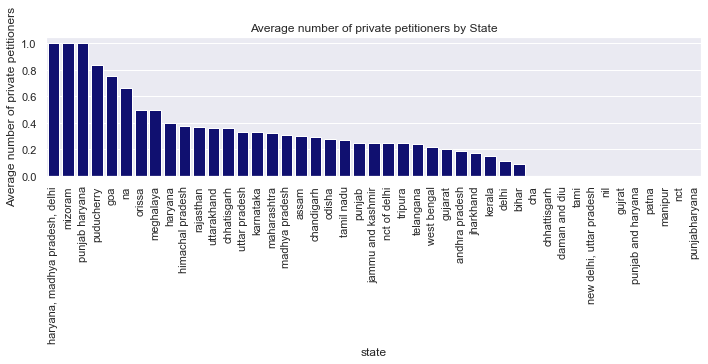

In [150]:
# private petitioners -- average
states_tup = list(zip(df_cases_cleaned["state"], df_cases_cleaned["petitioner_private_firm_dummy"]))

df_statecit = pd.DataFrame(data = states_tup, columns = ["state", "petitioner_private_firm_dummy"])
df_statecit = df_statecit.dropna()

num_cites = df_statecit.groupby(["state"]).agg(["mean"])["petitioner_private_firm_dummy"].reset_index(drop=False)

num_cites = num_cites.sort_values(["mean"], ascending=False).reset_index(drop=True)

num_cites["Average number of private petitioners"] = num_cites["mean"]

f=sns.barplot(data = num_cites, x = num_cites.state, y = num_cites["Average number of private petitioners"], color = "navy").set(title="Average number of private petitioners by State")
plt.xticks(rotation=90)
plt.tight_layout()
#f = fig.get_figure()
plt.savefig(figures+"avgprivpetitioners.jpg")
plt.show()

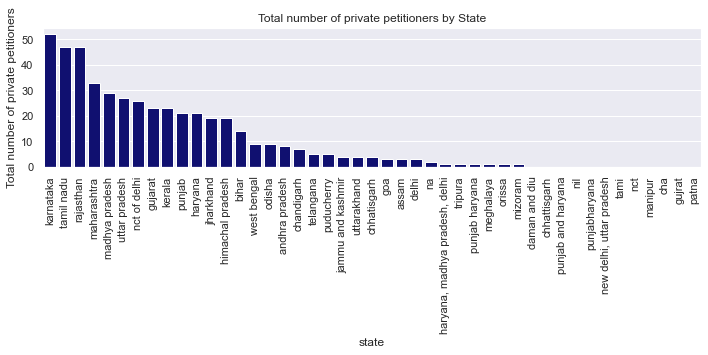

In [151]:
# private petitioners -- sum
states_tup = list(zip(df_cases_cleaned["state"], df_cases_cleaned["petitioner_private_firm_dummy"]))

df_statecit = pd.DataFrame(data = states_tup, columns = ["state", "petitioner_private_firm_dummy"])
df_statecit = df_statecit.dropna()

num_cites = df_statecit.groupby(["state"]).agg(["sum"])["petitioner_private_firm_dummy"].reset_index(drop=False)

num_cites = num_cites.sort_values(["sum"], ascending=False).reset_index(drop=True)

num_cites["Total number of private petitioners"] = num_cites["sum"]

f=sns.barplot(data = num_cites, x = num_cites.state, y = num_cites["Total number of private petitioners"], color = "navy").set(title="Total number of private petitioners by State")
plt.xticks(rotation=90)
plt.tight_layout()
#f = fig.get_figure()
plt.savefig(figures+"totprivpetitioners.jpg")
plt.show()

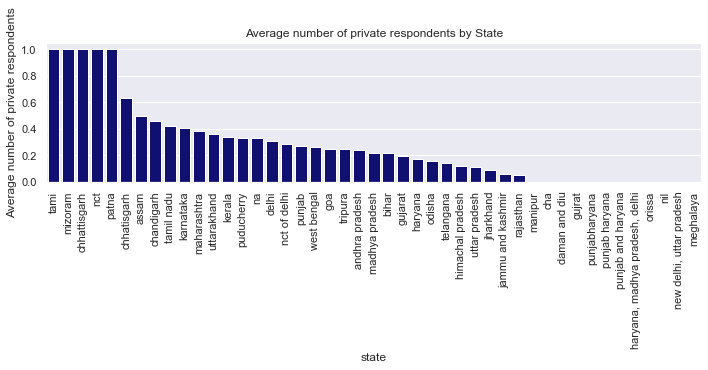

In [152]:
# private respondents -- average
states_tup = list(zip(df_cases_cleaned["state"], df_cases_cleaned["respondent_private_firm_dummy"]))

df_statecit = pd.DataFrame(data = states_tup, columns = ["state", "respondent_private_firm_dummy"])
df_statecit = df_statecit.dropna()

num_cites = df_statecit.groupby(["state"]).agg(["mean"])["respondent_private_firm_dummy"].reset_index(drop=False)

num_cites = num_cites.sort_values(["mean"], ascending=False).reset_index(drop=True)

num_cites["Average number of private respondents"] = num_cites["mean"]

f=sns.barplot(data = num_cites, x = num_cites.state, y = num_cites["Average number of private respondents"], color = "navy").set(title="Average number of private respondents by State")
plt.xticks(rotation=90)
plt.tight_layout()
#f = fig.get_figure()
plt.savefig(figures+"avgprivrespondents.jpg")
plt.show()


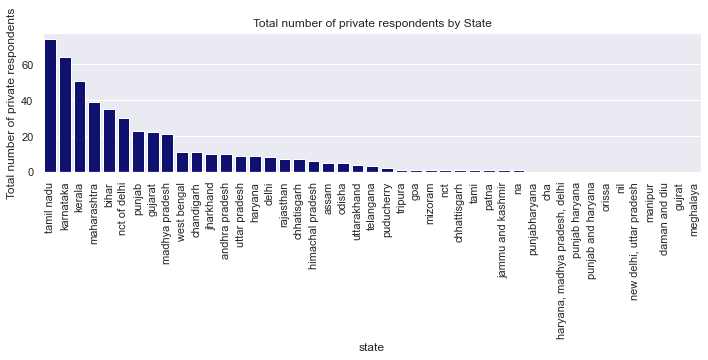

In [153]:
# private respondents -- sum
states_tup = list(zip(df_cases_cleaned["state"], df_cases_cleaned["respondent_private_firm_dummy"]))

df_statecit = pd.DataFrame(data = states_tup, columns = ["state", "respondent_private_firm_dummy"])
df_statecit = df_statecit.dropna()

num_cites = df_statecit.groupby(["state"]).agg(["sum"])["respondent_private_firm_dummy"].reset_index(drop=False)

num_cites = num_cites.sort_values(["sum"], ascending=False).reset_index(drop=True)

num_cites["Total number of private respondents"] = num_cites["sum"]

f=sns.barplot(data = num_cites, x = num_cites.state, y = num_cites["Total number of private respondents"], color = "navy").set(title="Total number of private respondents by State")
plt.xticks(rotation=90)
plt.tight_layout()
#f = fig.get_figure()
plt.savefig(figures+"totprivrespondents.jpg")
plt.show()

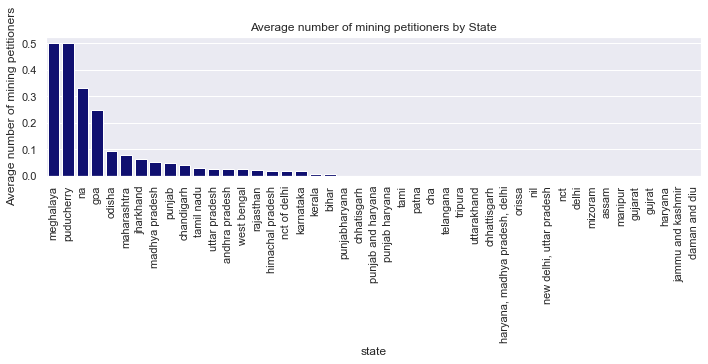

In [154]:
# mining petitioners -- average
states_tup = list(zip(df_cases_cleaned["state"], df_cases_cleaned["petitioner_mining_firm_dummy"]))

df_statecit = pd.DataFrame(data = states_tup, columns = ["state", "petitioner_mining_firm_dummy"])
df_statecit = df_statecit.dropna()

num_cites = df_statecit.groupby(["state"]).agg(["mean"])["petitioner_mining_firm_dummy"].reset_index(drop=False)

num_cites = num_cites.sort_values(["mean"], ascending=False).reset_index(drop=True)

num_cites["Average number of mining petitioners"] = num_cites["mean"]

f=sns.barplot(data = num_cites, x = num_cites.state, y = num_cites["Average number of mining petitioners"], color = "navy").set(title="Average number of mining petitioners by State")
plt.xticks(rotation=90)
plt.tight_layout()
#f = fig.get_figure()
plt.savefig(figures+"avgminingpetitioners.jpg")
plt.show()

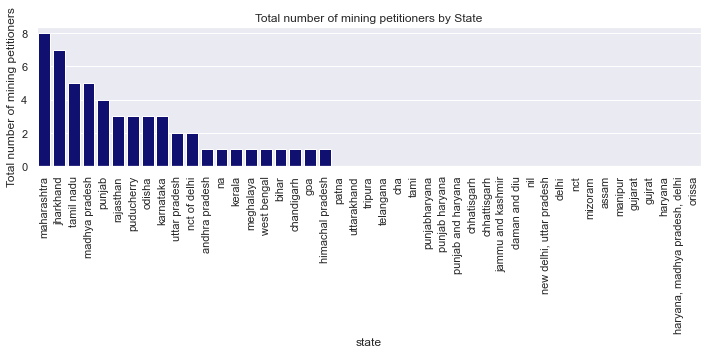

In [155]:
# mining petitioners -- sum
states_tup = list(zip(df_cases_cleaned["state"], df_cases_cleaned["petitioner_mining_firm_dummy"]))

df_statecit = pd.DataFrame(data = states_tup, columns = ["state", "petitioner_mining_firm_dummy"])
df_statecit = df_statecit.dropna()

num_cites = df_statecit.groupby(["state"]).agg(["sum"])["petitioner_mining_firm_dummy"].reset_index(drop=False)

num_cites = num_cites.sort_values(["sum"], ascending=False).reset_index(drop=True)

num_cites["Total number of mining petitioners"] = num_cites["sum"]

f=sns.barplot(data = num_cites, x = num_cites.state, y = num_cites["Total number of mining petitioners"], color = "navy").set(title="Total number of mining petitioners by State")
plt.xticks(rotation=90)
plt.tight_layout()
#f = fig.get_figure()
plt.savefig(figures+"totminingpetitioners.jpg")
plt.show()

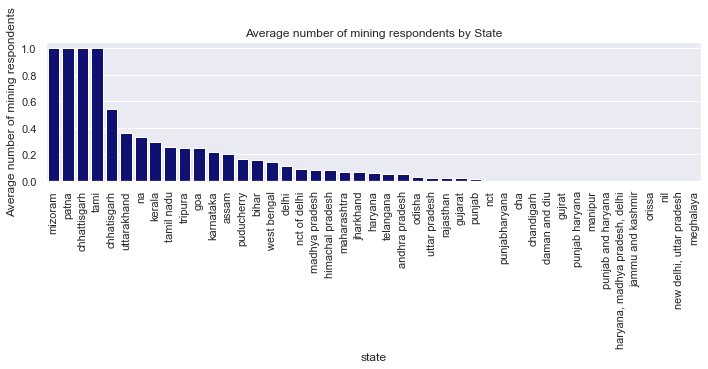

In [156]:
# mining respondents -- average
states_tup = list(zip(df_cases_cleaned["state"], df_cases_cleaned["respondent_mining_firm_dummy"]))

df_statecit = pd.DataFrame(data = states_tup, columns = ["state", "respondent_mining_firm_dummy"])
df_statecit = df_statecit.dropna()

num_cites = df_statecit.groupby(["state"]).agg(["mean"])["respondent_mining_firm_dummy"].reset_index(drop=False)

num_cites = num_cites.sort_values(["mean"], ascending=False).reset_index(drop=True)

num_cites["Average number of mining respondents"] = num_cites["mean"]

f=sns.barplot(data = num_cites, x = num_cites.state, y = num_cites["Average number of mining respondents"], color = "navy").set(title="Average number of mining respondents by State")
plt.xticks(rotation=90)
plt.tight_layout()
#f = fig.get_figure()
plt.savefig(figures+"avgminingrespondents.jpg")
plt.show()

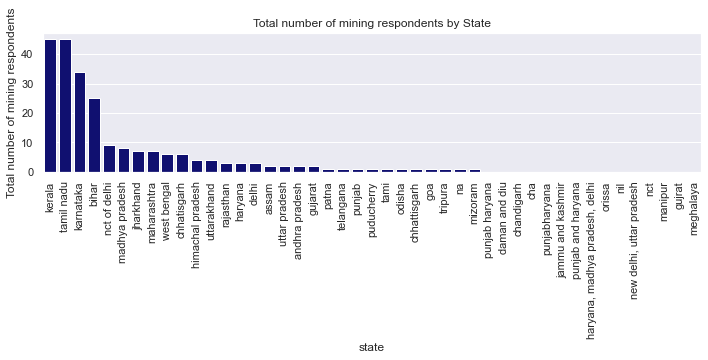

In [157]:
# mining respondents -- average
states_tup = list(zip(df_cases_cleaned["state"], df_cases_cleaned["respondent_mining_firm_dummy"]))

df_statecit = pd.DataFrame(data = states_tup, columns = ["state", "respondent_mining_firm_dummy"])
df_statecit = df_statecit.dropna()

num_cites = df_statecit.groupby(["state"]).agg(["sum"])["respondent_mining_firm_dummy"].reset_index(drop=False)

num_cites = num_cites.sort_values(["sum"], ascending=False).reset_index(drop=True)

num_cites["Total number of mining respondents"] = num_cites["sum"]

f=sns.barplot(data = num_cites, x = num_cites.state, y = num_cites["Total number of mining respondents"], color = "navy").set(title="Total number of mining respondents by State")
plt.xticks(rotation=90)
plt.tight_layout()
#f = fig.get_figure()
plt.savefig(figures+"totminingrespondents.jpg")
plt.show()